<div style="text-align: center;">
    <h1> <font style="bold"> Analisis Predictivo Avanzado </font></h1>
    <h2><font style="bold">Trabajo práctico 2</font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Abril</li>
        <li>Arbues Lucas</li>
        <li>Alfie Agustin</li>
        </ul>
    </h4>
</div>

Las plataformas de streaming ofrecen una gran cantidad de películas, lo que a menudo resulta en una elección difícil para los usuarios. Esta "Parálisis por Análisis" puede afectar negativamente la experiencia del usuario, disminuyendo el compromiso con la plataforma y aumentando las tasas de cancelación de suscripciones.

# Justificacion de Negocio

El sistema de recomendación de películas está diseñado para **mejorar la experiencia del usuario** mediante la facilitación de la elección de contenidos. El desafío radica en desarrollar un mecanismo que no solo se alinee con las preferencias individuales de los usuarios sino que también fomente el descubrimiento de nuevas películas que puedan ser de su interés, con el fin de aumentar su satisfacción y fidelidad a la plataforma.

<p align="center">
  <img src="imagenes/movierecommendation.png" alt="Movie Recommendation System" width="400"/>
</p>

Este Notebook se enfocará en el desarrollo de un sistema de recomendación de películas mediante el uso de técnicas avanzadas de machine learning. Se utilizarán algoritmos de filtrado colaborativo, metodos basados en memoria y metodos colaborativos para analizar los patrones de visualización, las calificaciones y los metadatos de las películas, con el objetivo de proporcionar recomendaciones precisas y personalizadas.

Se incluirá en el proyecto una fase de despliegue (deploy) que permitirá a los usuarios interactuar con el sistema de recomendación en un entorno operativo. Mediante una interfaz sencilla, los usuarios podrán ingresar su ID y el título de una película que les haya gustado para recibir recomendaciones personalizadas. Este enfoque asegura la transición del modelo desde el desarrollo hasta su aplicación práctica, donde su efectividad puede ser evaluada en términos de mejora en la experiencia del usuario.

Este Notebook documentará el proceso completo, desde la preparación de los datos hasta el despliegue operativo del sistema, sirviendo como una guía detallada para la implementación del sistema de recomendación y la evaluación de su rendimiento en un escenario real.

# Preparacion de la Informacion

## Imports

In [8]:
import pandas as pd
import numpy as np
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import ast
from ast import literal_eval
import geopandas as gpd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## Carga de Bases de Datos

In [2]:
movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')

/var/folders/9k/p0fvsltn31bgmv55mws4vsnr0000gn/T/ipykernel_59149/3221149849.py:1: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("input/movies_metadata.csv", quotechar='"')


## Preparacion de Datos

In [22]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'adult', 'budget',
       'revenue', 'runtime', 'status', 'tagline', 'video',
       'belongs_to_collection', 'homepage', 'imdb_id', 'original_title',
       'poster_path', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

### Columnas

* **adult:** Indica si la pelicula es X-Rated o Adult.
* **belongs_to_collection:** Un diccionario que da informacion de la saga a la que la pelicula pertenece.
* **budget:** Presupuesto de la pelicula en dolares. 
* **genres:** Una lista en forma de texto de diccionarios que enumeran todos los géneros asociados con la película.
* **homepage:** La página oficial de la película.
* **id:** El ID de la película.
* **imdb_id:** El ID de IMDB de la película.
* **original_language:** El idioma en el que la película fue originalmente filmada.
* **original_title:** El título original de la película.
* **overview:** Una breve descripción de la película.
* **popularity:** La puntuación de popularidad asignada por TMDB.
* **poster_path:** La URL de la imagen del póster.
* **production_companies:** Una lista en forma de texto de las compañías de producción involucradas en la realización de la película.
* **production_countries:** Una lista en forma de texto de los países donde la película fue rodada/producida.
* **release_date:** Fecha de lanzamiento teatral de la película.
* **revenue:** Los ingresos totales de la película en dólares.
* **runtime:** La duración de la película en minutos.
* **spoken_languages:** Una lista en forma de texto de los idiomas hablados en la película.
* **status:** El estado de la película (Estrenada, Por estrenar, Anunciada, etc.)
* **tagline:** El lema publicitario de la película.
* **title:** El título oficial de la película.
* **video:** Indica si hay un video presente de la película en TMDB.
* **vote_average:** La calificación promedio de la película.
* **vote_count:** El número de votos de usuarios, según lo contado por TMDB.

In [ ]:
movies.shape

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55332 entries, 0 to 55331
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  55326 non-null  object 
 1   overview               54341 non-null  object 
 2   release_date           55230 non-null  object 
 3   vote_average           55325 non-null  float64
 4   vote_count             55325 non-null  object 
 5   genres                 55331 non-null  object 
 6   id                     55331 non-null  object 
 7   original_language      55320 non-null  object 
 8   popularity             55326 non-null  object 
 9   adult                  55331 non-null  object 
 10  budget                 55331 non-null  object 
 11  revenue                55325 non-null  float64
 12  runtime                55068 non-null  object 
 13  status                 55243 non-null  object 
 14  tagline                27979 non-null  object 
 15  vi

In [6]:
movies.head(2)

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,adult,...,tagline,video,belongs_to_collection,homepage,imdb_id,original_title,poster_path,production_companies,production_countries,spoken_languages
0,Expend4bles,Armed with every weapon they can get their han...,15/09/2023,6.406,764,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",299054,en,1294.274,FALSE,...,They'll die when they're dead.,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Five Nights at Freddy's,"Recently fired and desperate for work, a troub...",25/10/2023,7.932,2365,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",507089,en,1859.189,FALSE,...,Can you survive five nights?,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


La informacion actualizada no trae las siguientes columnas:
belongs_to_collection,	homepage,	imdb_id	original_title,	poster_path	production_companies,	production_countries y	spoken_languages

### Data Wrangling

El ID de IMDB no es representativo por lo que sera eliminado, el que es utilizado para vincular la informacion de las peliculas con los links, ratings y keywords es ID.

In [3]:
movies = movies.drop(['imdb_id'], axis=1)

La columna original_title representa el titulo de la pelicula en el idioma original. Para mantener la consistencia se mantiene unicamente la variable traducida **title**.

In [4]:
movies[movies['original_title'] != movies['title']][['title', 'original_title']].tail()

,title,original_title
55319,Mom,Maa
55321,St. Michael Had a Rooster,San Michele aveva un gallo
55327,Subdue,رگ خواب
55328,Century of Birthing,Siglo ng Pagluluwal
55330,Satan Triumphant,Satana likuyushchiy


In [5]:
movies = movies.drop('original_title', axis=1)

Se procesan los titulos para eliminar inconsistencias

In [6]:
# Eliminar espacios adelante y al final del titulo
movies['title'] = movies['title'].str.strip()

Se identifican los titulos repetidos y se eliminan duplicados.

In [7]:
movies['title'].value_counts()

title
Cinderella                                          15
Beauty and the Beast                                12
Alice in Wonderland                                 11
The Three Musketeers                                11
Hamlet                                              11
                                                    ..
The Cuenca Crime                                     1
Korczak                                              1
You're Gonna Miss Me: A Film About Roky Erickson     1
Dimensions of Dialogue                               1
Queerama                                             1
Name: count, Length: 45876, dtype: int64

In [8]:
# Calcula la cantidad de valores NaN en cada fila
movies['nan_count'] = movies.apply(lambda x: x.isna().sum(), axis=1)

# Agrupa por 'title', luego ordena dentro de cada grupo por 'nan_count', y finalmente toma la primera fila de cada grupo
movies = movies.sort_values('nan_count').groupby('title', as_index=False).first()

movies.drop('nan_count', axis=1, inplace=True)

# En el caso de que haya un mismo valor de nan_count para varios títulos, se deja solamente uno
movies = movies[movies.duplicated(subset='title', keep=False) == False]

Aunque una gran proporcion de la base presenta **revenue** 0, refiriendose a la falta de informacion de este valor, se considera esta columna como clave para el analisis exploratorio por lo que no se eliminara. Se reemplazan los valores 0 por nulos.

In [16]:
print("proporcion de informacion con revenue 0: ", round(len(movies[movies['revenue'] == 0]) * 100 / len(movies),2), "%")

proporcion de informacion con revenue 0:  82.15 %


In [9]:
movies['revenue'] = movies['revenue'].replace(0, np.nan)

Se toma una decision similar para el **budget**. Primero se convierte la columna a numerica y luego se reemplazan los valores 0 por nulos.

In [10]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
print("proporcion de informacion con budget 0: ", round(len(movies[movies['budget'] == 0]) * 100 / len(movies),2), "%")
movies['budget'] = movies['budget'].replace(0, np.nan)

proporcion de informacion con budget 0:  79.59 %


Se crea la columna profit:

In [11]:
movies['profit'] = movies['revenue'] - movies['budget']

Se procesa la fecha para que sostenga un formato constante:

In [12]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

Se obtiene la columna year a partir de la fecha:

In [13]:
# Obtener el año de la fecha de lanzamiento
movies['year'] = movies['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [14]:
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')

No hay casi peliculas que sean para **adultos**, por lo que la variable no es muy representativa.

In [23]:
print("proporcion de informacion que no es para adultos: ", round(len(movies[movies['adult'] == 'FALSE']) * 100 / len(movies),2), "%")

proporcion de informacion que no es para adultos:  99.97 %


In [15]:
movies = movies.drop('adult', axis=1)

Para poder visualizar las imagenes del poster se reestructura la informacion:

In [16]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
movies['poster_path'] = "<img src='" + base_poster_url + movies['poster_path'] + "' style='height:100px;'>"

In [17]:
# Como se puede observar, no todas las rutas cuentan con una imagen
poster = pd.DataFrame(movies[movies['poster_path'].notnull()]['poster_path'].tail(2))
HTML(poster.to_html(escape=False))

,poster_path
45872,
45875,


### Valores Faltantes

In [18]:
# Convierto todos los nulos a un mismo valor para poder trabajar con ellos
movies.replace([None, "nan", "", "NA", "NULL", -9999], np.nan, inplace=True)

In [19]:
nulos = (movies.isna().sum()) / (len(movies)) * 100
nulos.sort_values(ascending = False, inplace = True)

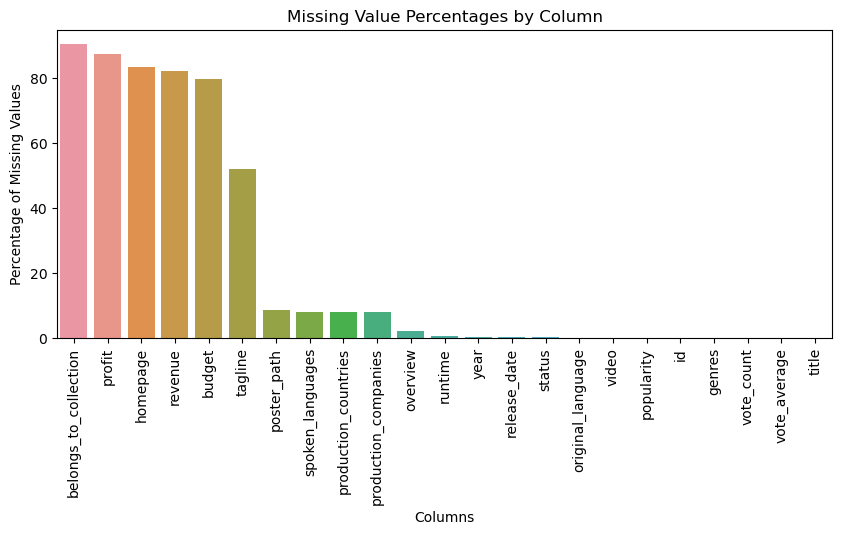

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(x = nulos.index, y = nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Value Percentages by Column')
plt.show()

In [20]:
# Ajustar la precisión de visualización a 2 decimales
# pd.set_option('display.float_format', '{:.2f}'.format)

missing_percentage = movies.isnull().mean() * 100

# Convertir a DataFrame
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Column', 'Nulos']

missing_percentage

,Column,Nulos
0,title,0.000000
1,overview,2.044642
2,release_date,55.296887
3,vote_average,0.002180
4,vote_count,0.002180
5,genres,0.002180
6,id,0.002180
7,original_language,0.026157
8,popularity,0.002180
9,budget,79.592815


Se eliminan todas las peliculas que no puedan ser identificadas por un id:

In [21]:
movies[(movies['id'].isna())]

,title,overview,release_date,vote_average,vote_count,genres,id,original_language,popularity,budget,...,tagline,video,belongs_to_collection,homepage,poster_path,production_companies,production_countries,spoken_languages,profit,year
23249,Munthiri Kaadu,In a Village Where they used to Honor Kill Lov...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Elimino pelicula con id na o nulo
movies = movies[(movies['id'].notna()) & (movies['id'] != 'ta') & (movies['id'] != '20/08/1997') & (movies['id'] != '29/09/2012') & (movies['id'] != '01/01/2014')]

In [23]:
# Convierte el id a entero
movies['id'] = movies['id'].astype('int')

# Exploratory Data Analysis (EDA)

#### Worldclouds: 
Estudiar la importancia de la presencia de ciertas palabras en los titulos y descripcion de la pelicula.

In [24]:
movies['title'] = movies['title'].astype('str')
words_title = ' '.join(movies['title'])

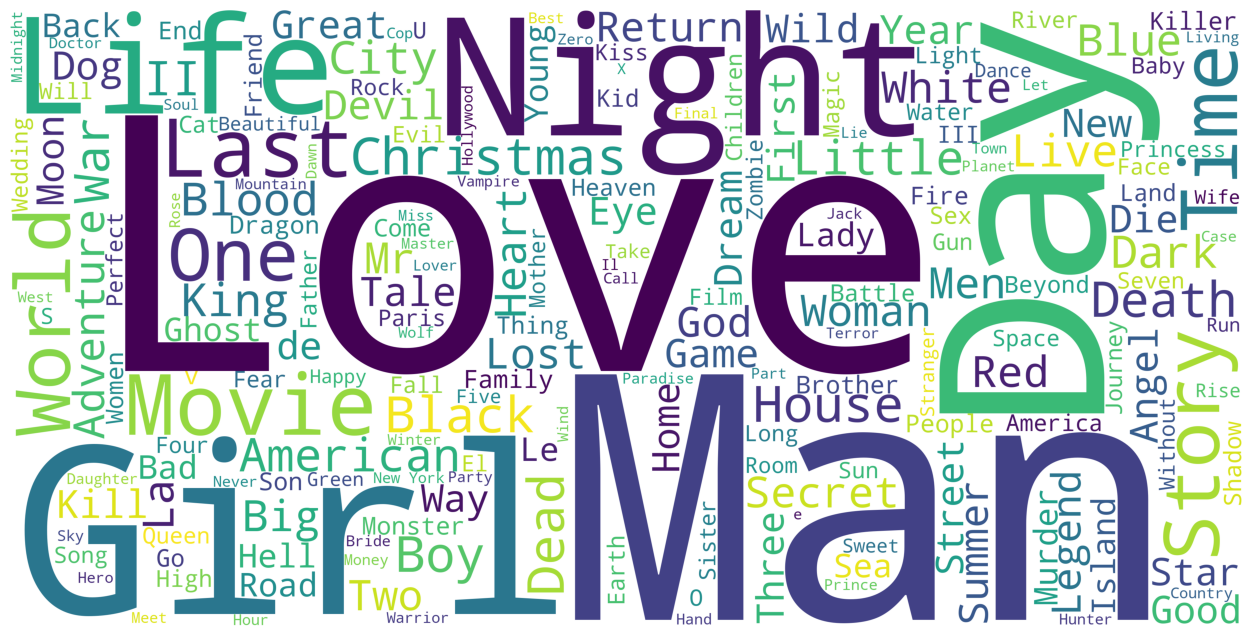

In [45]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_title)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

La palabra **Love** es la mas comun dentro de la eleccion de palabras para titulos. **Man**, **Day** y **Girl** tambien son palabras comunmente utilizadas. Esto encapsula bastante bien la idea de la presencia del romance en las películas.

In [25]:
movies['overview'] = movies['overview'].astype('str')
words_overview = ' '.join(movies['overview'])

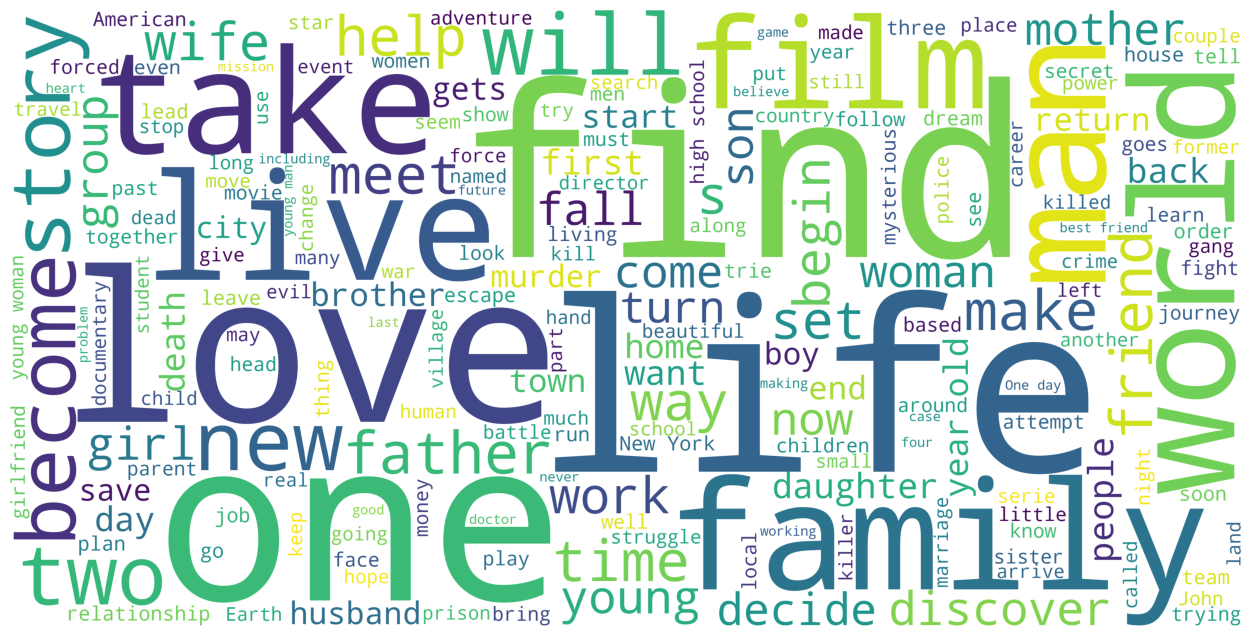

In [47]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(words_overview)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

**Find**, **Life** y **One** son las palabras mas frecuentes dentro de las descripciones de las peliculas. **Love**, **Man** y **Girl** no solo estan presentes en los titulos, sino que se repiten en la descripcion.

#### Lenguaje y Paises:
Estudiar la procedencia de las peliculas.

In [26]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(ast.literal_eval)
movies['production_countries'] = movies['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [27]:
country = movies.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
country.name = 'countries'

In [28]:
countries = movies.drop('production_countries', axis=1).join(country)
countries = pd.DataFrame(countries['countries'].value_counts())
countries['country'] = countries.index
countries.columns = ['count', 'country']
countries = countries.reset_index(drop=True)

countries.head(10)

,count,country
0,19770,United States of America
1,3743,United Kingdom
2,3610,France
3,2082,Germany
4,2013,Italy
5,1659,Canada
6,1564,Japan
7,897,Spain
8,815,Russia
9,792,India


La mayoria de las peliculas fueron producidas en **Estados Unidos** dado que la mayoria de las peliculas que comprenden el dataset son en ingles.

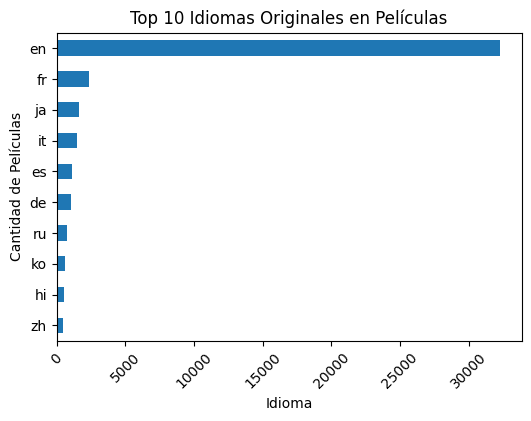

In [53]:
top_languages = movies['original_language'].value_counts().head(10)

# Invertir el orden para que el gráfico sea descendente
top_languages = top_languages.sort_values()

# Creando el gráfico de barras
plt.figure(figsize=(6, 4))
top_languages.plot(kind='barh')
plt.title('Top 10 Idiomas Originales en Películas')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.show()

In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/var/folders/9k/p0fvsltn31bgmv55mws4vsnr0000gn/T/ipykernel_59149/3926210268.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [31]:
merged = world.set_index('name').join(countries.set_index('country'))

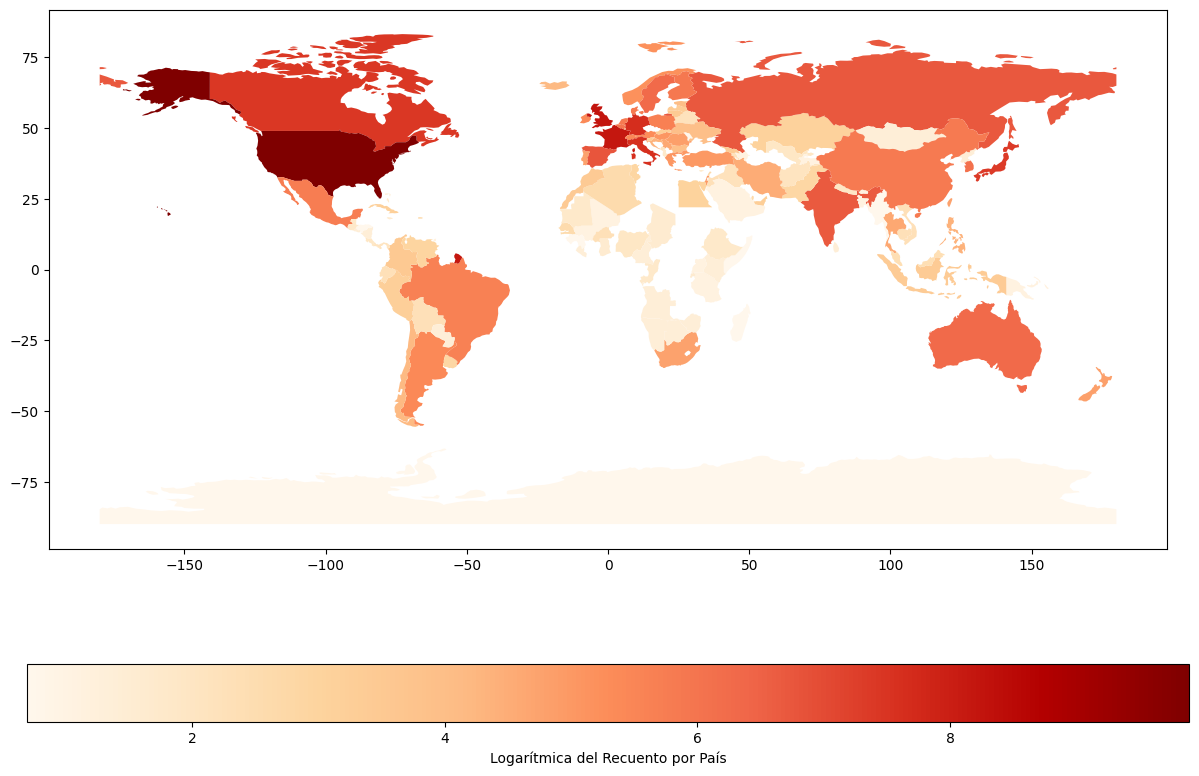

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Reemplazar valores de 'count' igual a 0 con un número muy pequeño para evitar problemas con el logaritmo
merged['count_log'] = np.log(merged['count'] + 1)

merged.plot(column='count_log', ax=ax, cmap='OrRd', legend=True,
            norm=plt.Normalize(vmin=merged['count_log'].min(), vmax=merged['count_log'].max()),
            legend_kwds={'label': "Logarítmica del Recuento por País",
                         'orientation': "horizontal"})
plt.show()

Se toma el logaritmo de la cantidad en el grafico para poder representar la informacion mejor dado el desbalance presentado por la presencia mayoritaria de peliculas estadounidenses. Ademas de **Estados Unidos**, **Europa** es un gran productor de peliculas.

#### Sagas:

In [32]:
import re
def extract_name(s):
    if isinstance(s, str):
        match = re.search(r"'name':\s*'([^']*)'", s)
        if match:
            return match.group(1)
    return None

In [33]:
movies['belongs_to_collection'] = movies['belongs_to_collection'].apply(extract_name)

In [34]:
# Almaceno los registros si las compañias productoras es una lista no vacía
saga = movies[movies['belongs_to_collection'].notna()]

In [35]:
saga = saga.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [36]:
# Suponiendo que tu DataFrame se llama df
# Ajusta el formato de los números flotantes para que no usen notación científica
pd.set_option('display.float_format', '{:.0f}'.format)

In [37]:
saga.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
534,Harry Potter Collection,8,963420928,7707367425
1118,Star Wars Collection,8,929311849,7434494790
626,James Bond Collection,25,282609021,7065225521
1268,The Fast and the Furious Collection,8,640637349,5125098793
934,Pirates of the Caribbean Collection,5,904315365,4521576826
1500,Transformers Collection,5,873220249,4366101244
312,Despicable Me Collection,4,922767554,3691070216
1441,The Twilight Collection,5,668421458,3342107290
591,Ice Age Collection,5,643341711,3216708553
646,Jurassic Park Collection,4,757871036,3031484143


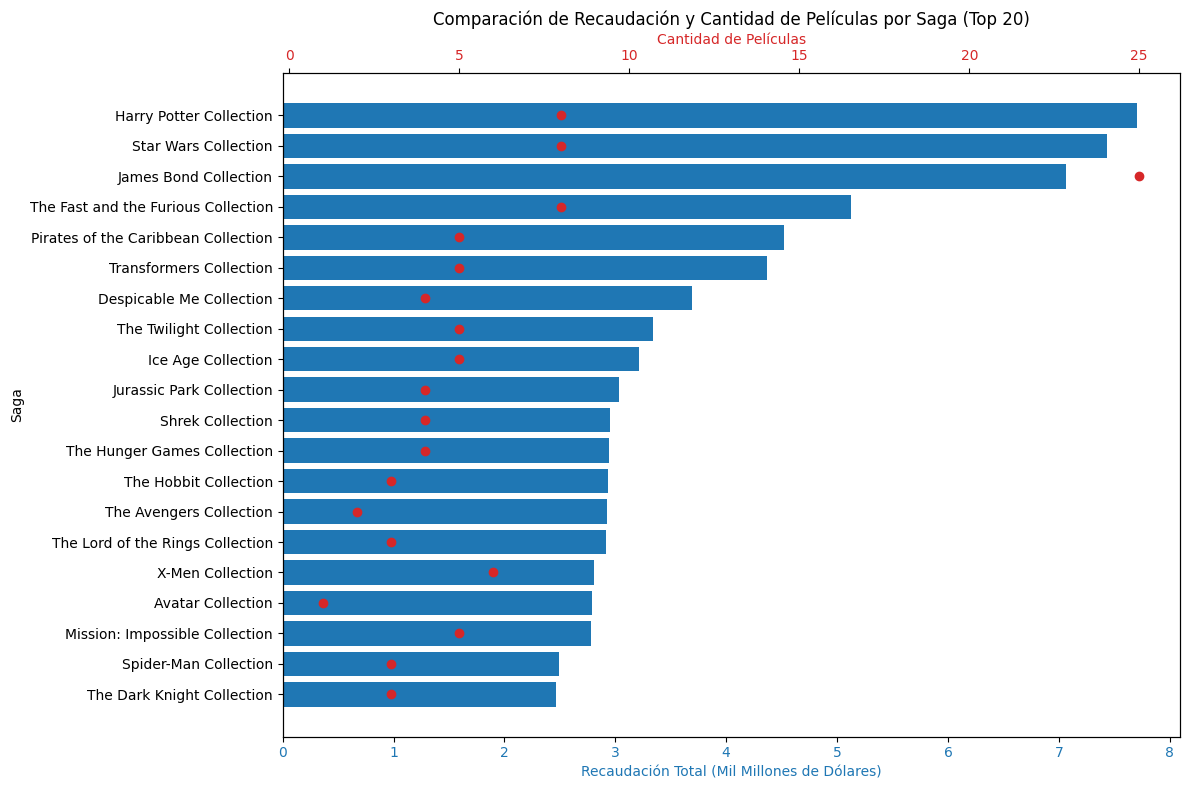

In [38]:
# Tomar las 20 franquicias principales
top_sagas = saga.sort_values(by='sum', ascending=False).head(20)
top_sagas = top_sagas.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Saga')
ax1.barh(top_sagas['belongs_to_collection'], top_sagas['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_sagas['count'], top_sagas['belongs_to_collection'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Saga (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

La saga de **Harry Potter** es la más exitosa en la industria cinematográfica, recaudando más de 7.707 mil millones de dólares con 8 películas. Las películas de **Star Wars** ocupan un cercano segundo lugar, con 7.403 mil millones de dólares también de 8 películas. **James Bond** está en tercer lugar, pero la saga tiene significativamente más películas en comparación con las demás en la lista y, por lo tanto, un promedio de recaudación mucho menor.

Segun la ganancia media de las sagas:

In [64]:
saga.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
109,Avatar Collection,1,2787965087,2787965087
1198,The Avengers Collection,2,1462480802,2924961604
465,Frozen Collection,1,1274219009,1274219009
432,Finding Nemo Collection,2,984453212,1968906425
1303,The Hobbit Collection,3,978507785,2935523356
1339,The Lord of the Rings Collection,3,972181581,2916544743
534,Harry Potter Collection,8,963420928,7707367425
1118,Star Wars Collection,8,929311849,7434494790
312,Despicable Me Collection,4,922767554,3691070216
934,Pirates of the Caribbean Collection,5,904315365,4521576826


La **Saga Avatar**, aunque actualmente solo consta de una película, es la franquicia más exitosa de todos los tiempos, con esa única película recaudando cerca de 3 mil millones de dólares. La **Saga de Harry Potter** sigue siendo la más exitosa con al menos 5 películas.

#### Companias Productoras:

In [39]:
movies['production_companies'] = movies['production_companies'].apply(extract_name)

In [40]:
# Almaceno los registros si las compañias productoras es una lista no vacía
companies = movies[movies['production_companies'].notna()]

In [41]:
companies = companies.pivot_table(index='production_companies', values='revenue', aggfunc={'revenue': ['sum', 'mean', 'count']}).reset_index()

In [42]:
companies.sort_values('sum', ascending=False).head(10)

,production_companies,count,mean,sum
6773,Paramount Pictures,364,124316378,45251161524
9335,Universal Pictures,379,116558171,44175546804
9596,Walt Disney Pictures,138,262991957,36292890050
2073,Columbia Pictures,221,138471202,30602135588
9201,Twentieth Century Fox Film Corporation,269,108766839,29258279795
6305,New Line Cinema,180,86878802,15638184400
9488,Village Roadshow Pictures,73,167963771,12261355291
9615,Warner Bros.,158,77327976,12217820211
2650,DreamWorks SKG,62,179908795,11154345261
5403,Lucasfilm,22,449928232,9898421106


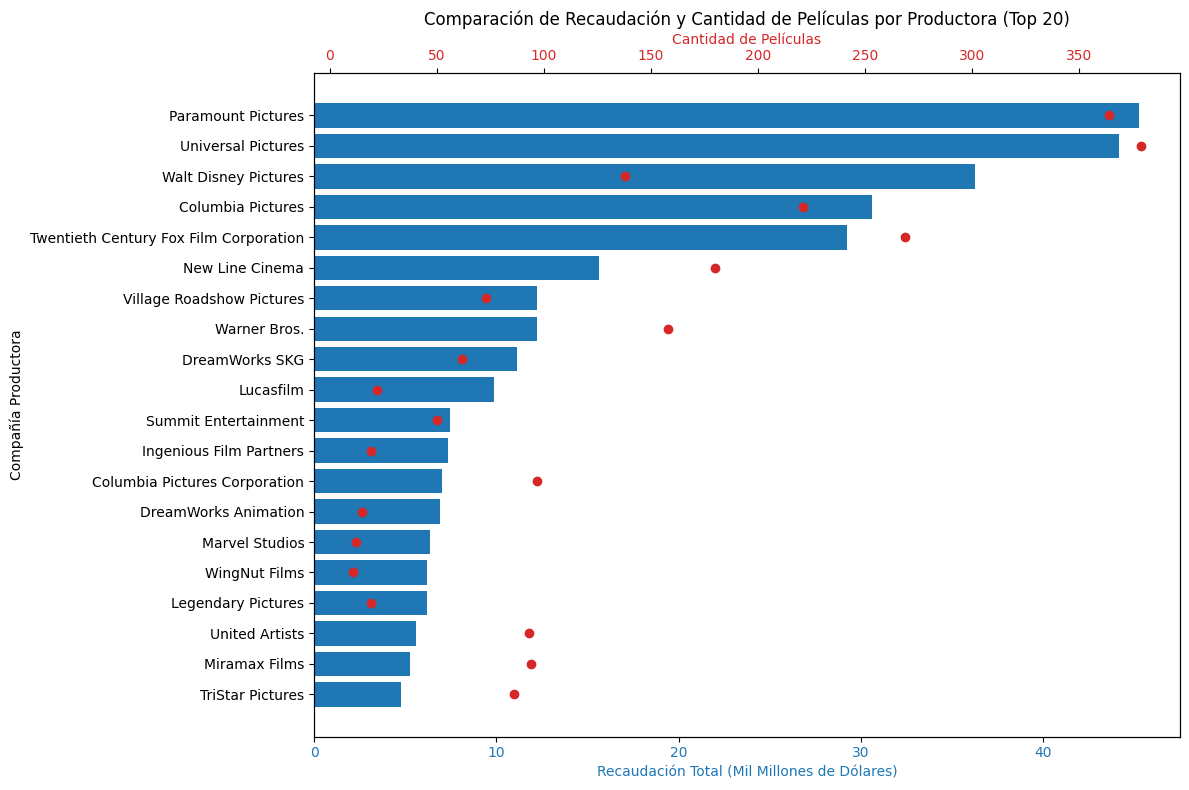

In [43]:
# Tomar las 20 franquicias principales
top_companies = companies.sort_values(by='sum', ascending=False).head(20)
top_companies = top_companies.sort_values(by='sum', ascending=True)

# Configurando el gráfico
fig, ax1 = plt.subplots(figsize=(12, 8))

# Eje para la cantidad recaudada
color = 'tab:blue'
ax1.set_xlabel('Recaudación Total (Mil Millones de Dólares)', color=color)
ax1.set_ylabel('Compañía Productora')
ax1.barh(top_companies['production_companies'], top_companies['sum'] / 1e9, color=color)
ax1.tick_params(axis='x', labelcolor=color)

# Crear un segundo eje para la cantidad de películas
ax2 = ax1.twiny()  # Instancia un segundo eje que comparte el mismo eje y
color = 'tab:red'
ax2.set_xlabel('Cantidad de Películas', color=color)
ax2.plot(top_companies['count'], top_companies['production_companies'], color=color, marker='o', linestyle='None')
ax2.tick_params(axis='x', labelcolor=color)

# Título y ajustes finales
plt.title('Comparación de Recaudación y Cantidad de Películas por Productora (Top 20)')
fig.tight_layout()  # Para asegurar que no haya solapamiento de etiquetas
plt.show()

**Paramount Pictures** y **Universal Pictures** se destacan como las productoras con el mayor número de películas, aunque no necesariamente es la que lidera en términos de recaudación por pelicula, lo que sugiere una estrategia de producción más enfocada en cantidad. Por otro lado, algunas productoras como **Walt Disney Pictures** y **Pixar Animation Studios**, presentan una menor cantidad de producciones pero con una recaudación total muy alta, indicando que sus películas tienden a ser éxitos que generan ingresos significativos.

#### Popularidad, Voto Promedio y Cantidad de Votos:
En esta sección, trabajaremos con las métricas proporcionadas por los usuarios de TMDB. Intentaremos obtener una comprensión más profunda de las características de popularidad, promedio de votos y conteo de votos e intentaremos deducir cualquier relación entre ellas, así como con otras características numéricas como el presupuesto y los ingresos.

In [44]:
# Convertir las columnas popularity, vote_count y vote_average a numéricas
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['vote_count'] = pd.to_numeric(movies['vote_count'], errors='coerce')
movies['vote_average'] = pd.to_numeric(movies['vote_average'], errors='coerce')

In [71]:
movies.describe()

,release_date,vote_average,vote_count,id,popularity,budget,revenue,profit,year
count,20508,45874,45874,45874,45874,9362,8185,5874,20508
mean,1994-04-10 18:10:15.096547712,6,166,149806,6,23944647,74158221,64651372,1994
min,1900-01-01 00:00:00,0,0,2,0,1,1,-185600000,1900
25%,1981-01-04 18:00:00,5,3,28300,0,2200000,2543216,-1871871,1981
50%,2002-10-09 00:00:00,6,11,68726,1,10000000,17322136,11689234,2002
75%,2011-10-17 00:00:00,7,47,207694,5,28000000,69633110,66205999,2011
max,2027-06-05 00:00:00,10,27972,1203973,2719,460000000,2800000000,2550965087,2027
std,NaN,2,742,197335,30,38414701,163594159,157606049,23


<Axes: ylabel='Frequency'>

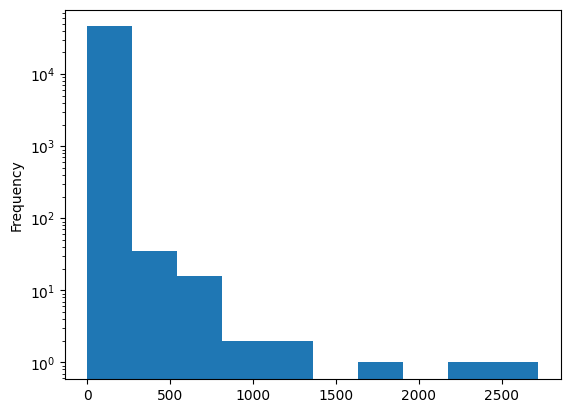

In [72]:
# Boxplot de la popularidad
# sns.distplot(movies['popularity'])
movies['popularity'].plot(logy=True, kind='hist')

La popularidad parece seguir una distribucion Lognormal, por lo que son muchos con baja popularidad y pocos que consiguen llegar a un valor alto. La media es 2.9, pero el maximo llega a 2719. De todas formas, como se ve en el grafico, todas las peliculas bajo el percentil 75 tienen un valor menor a 9.

La popularidad de las peliculas se mide segun (https://developer.themoviedb.org/docs/popularity-and-trending): 
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

In [45]:
movies[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
25271,Oppenheimer,2719,NaN
34623,The Creator,2234,NaN
12617,Five Nights at Freddy's,1859,NaN
11791,Expend4bles,1294,NaN
22602,Mission: Impossible - Dead Reckoning Part One,1145,2023
12125,Fast X,973,NaN
35301,The Equalizer 3,847,NaN
36613,The Hunger Games: The Ballad of Songbirds & Sn...,800,NaN
29129,Saw X,755,NaN
37923,The Marvels,713,2023


In [46]:
# Pelicula mas popular por año
popular_year = movies.sort_values('popularity', ascending=False).groupby('year').first().reset_index()

In [130]:
import plotly.express as px

# Crea un gráfico de barras interactivo con Plotly Express
fig = px.bar(
    popular_year,
    x='popularity',
    y='title',
    orientation='h',  # Gráfico de barras horizontal
    color='year',  # Colorea por año
    title='Película más popular por año'
)

# Configura los ejes y el título del gráfico
fig.update_layout(
    xaxis_title='Popularidad',
    yaxis_title='Título de la película',
    yaxis=dict(
        categoryorder='array', 
        categoryarray=popular_year.sort_values('year', ascending=False)['year'].unique()
    ),
    coloraxis_showscale=False  # Oculta la barra de color si no la necesitas
)

# Muestra el gráfico
fig.show()

<Axes: xlabel='vote_average'>

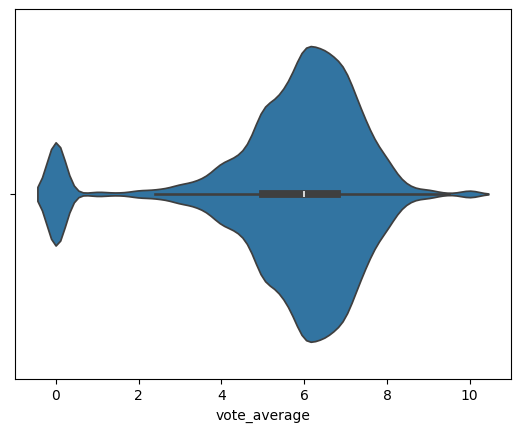

In [80]:
sns.violinplot(x=movies['vote_average'])

Parece que los votantes son bastante estrictos con sus notas, la media de los votos es de 6 de 10. Hay una gran elevacion en la distribucion en la puntuacion minima, pero esto puede ser producto de peliculas que no tuvieron evaluacion por votantes.

Para un analisis mas certero se tendran en cuenta unicamente los valores de votacion con mas de 5000 votos. Este criterio es empleado por IMDB's para seleccionar el top 250 peliculas.

<Axes: xlabel='vote_average'>

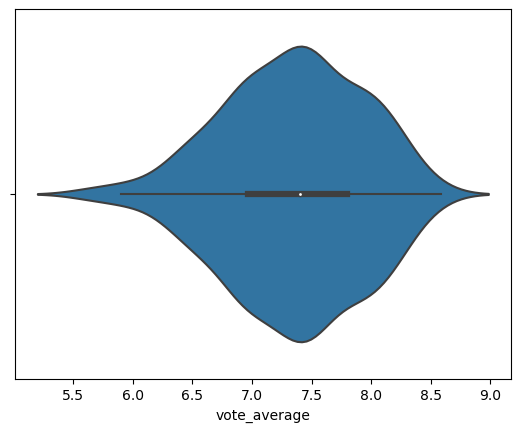

In [62]:
sns.violinplot(x=movies.loc[movies['vote_count'] > 5000,'vote_average'])

En este caso, se puede ver que la distribucion de los votos promedio varia entre 4 y 10. Por lo que los votantes son mas propensos a criticar positivamente las peliculas.

In [47]:
movies[movies['vote_count'] > 5000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
35980,The Godfather Part II,9,11453,NaN
39746,The Shawshank Redemption,8,8358,NaN
35979,The Godfather,8,6024,NaN
31188,Spider-Man: Into the Spider-Verse,8,14237,2018
21145,L√©on: The Professional,8,13810,NaN
12360,Fight Club,8,9678,NaN
27129,Pulp Fiction,8,8670,1994
34758,The Dark Knight,8,12269,NaN
12610,Five Feet Apart,8,5294,NaN
27206,Puss in Boots: The Last Wish,8,6627,2022


**The Godfather** y **The Shawshank Redemption** son las dos películas más aclamadas por la crítica en la base de datos de TMDB. Tienen una calificación de  9 en TMDB.

#### Generos:
Distribucion de genero y exploracion de tendencias.

In [48]:
def get_names(column):
    # Aplica ast.literal_eval para interpretar las cadenas como listas de diccionarios
    column = column.apply(lambda x: ast.literal_eval(x) if not pd.isna(x) else x)

    # Extrae los nombres de la lista de diccionarios
    column = column.apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

    return column

In [49]:
movies['genres'] = get_names(movies['genres'])

In [50]:
movies['genres'].head()

0                            [Documentary]
1                          [Comedy, Drama]
2    [Horror, Action, Adventure, Thriller]
3       [Drama, Mystery, Horror, Thriller]
4                            [Documentary]
Name: genres, dtype: object

In [51]:
s = movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
genres = movies.drop('genres', axis=1).join(s)

In [52]:
genres_count = genres['genre'].value_counts()
genres_count = genres_count.reset_index()
genres_count.columns = ['Genre', 'Count']

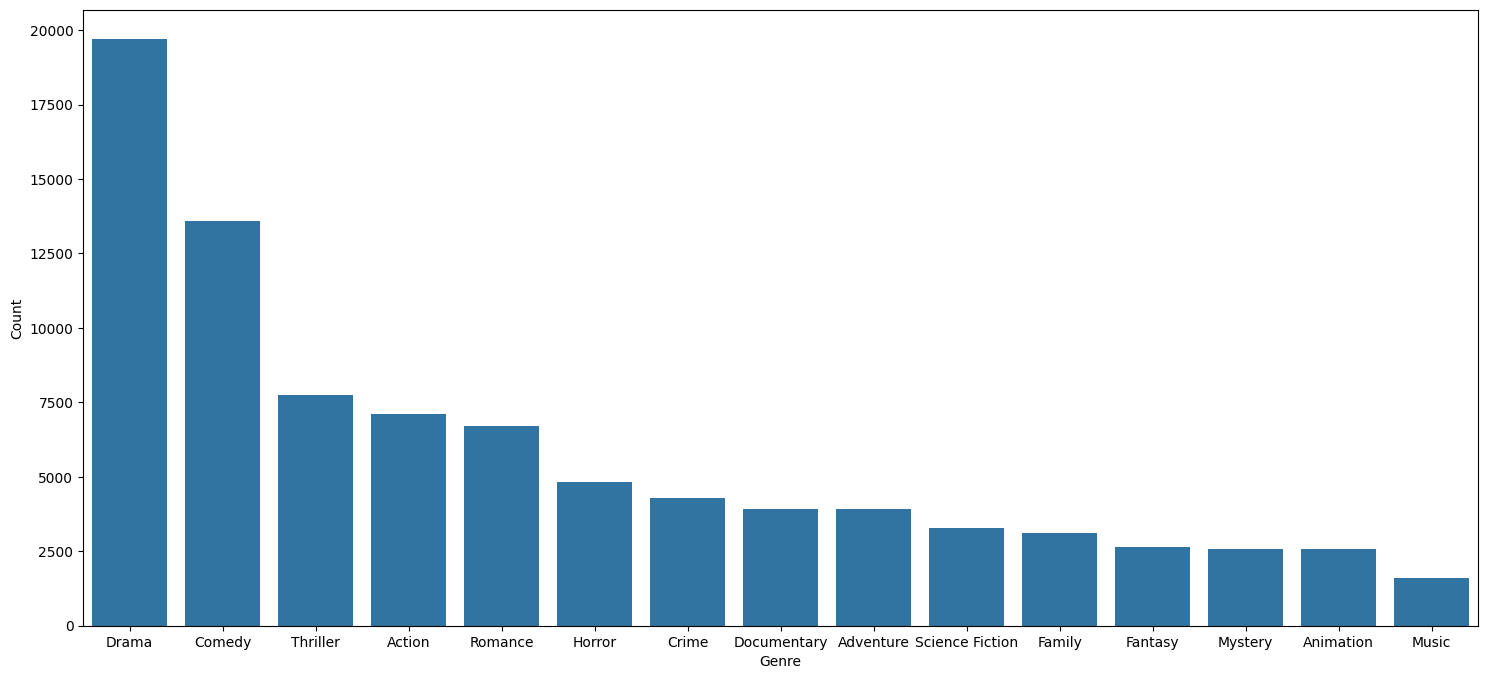

In [87]:
plt.figure(figsize=(18,8))
sns.barplot(x='Genre', y='Count', data=genres_count.head(15))
plt.show()

El **drama** es el género más común, con casi la mitad de las películas. La **comedia** llega en un distante segundo lugar, con un 25% de las películas. Otros géneros principales representados en el top 10 son **Acción, Terror, Crimen, Misterio, Ciencia Ficción, Animación y Fantasía**.

Para evaluar tendencias solo estaremos observando tendencias a partir del año 2000. Consideraremos solo aquellos temas que aparezcan en los 10 géneros más populares. 

In [53]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(10))) & (genres['year'] >= 2000) & (genres['year'] <= 2023)]

In [54]:
ctab = pd.crosstab(tendencia_genres['year'], tendencia_genres['genre'])
ctab = ctab.div(ctab.sum(axis=1), axis=0)

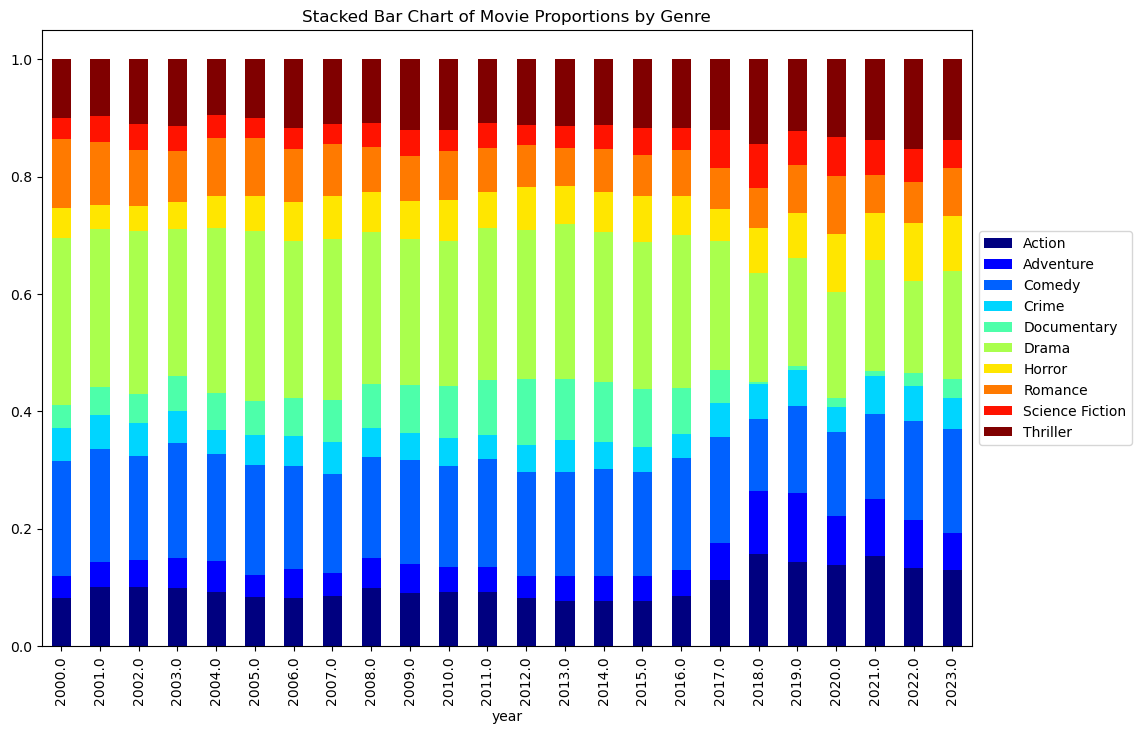

In [72]:
ctab.plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

La proporción de películas de cada género se ha mantenido bastante constante desde principios de este siglo, las mayores diferenciaciones se encuentran a partir del 2017. La proporción de películas **dramáticas** y **comedias** han caído. Las películas de **Thriller** y **Horror** han aumentado ligeramente.

ValueError: cannot reindex on an axis with duplicate labels

<Figure size 800x2000 with 0 Axes>

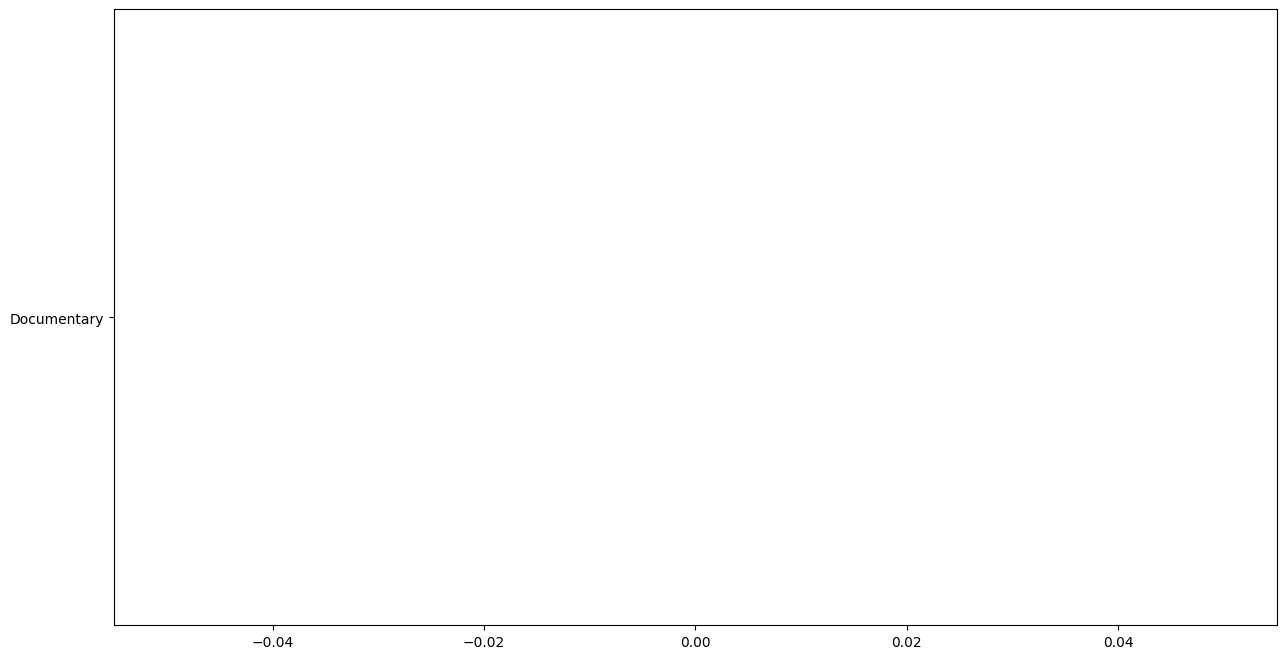

In [55]:
tendencia_genres = genres[(genres['genre'].isin(genres_count['Genre'].head(15)))]
plt.figure(figsize=(8,20))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(y=tendencia_genres["genre"], x=tendencia_genres["revenue"], ax =ax)
ax.set_xlim([0, 3e8])
plt.show()

Las películas de **Aventura**, **Animación** y **Familia** tienen el rango intercuartíl más amplio, así como la mediana de ingresos más alta entre todos los géneros representados. **Fantasía**, **Ciencia Ficción** tienen ingresos medianos similares aunque no son tan frecuentes como se analizo anteriormente.

#### Cast y Crew

In [56]:
credits_df = pd.read_csv('input/credits.csv')
credits_df.head()

,id,cast,crew
0,299054,"[{'cast_id': 976, 'name': 'Jason Statham', 'ch...","[{'crew_id': 966, 'name': 'Tim Maurice-Jones',..."
1,609681,"[{'cast_id': 60073, 'name': 'Brie Larson', 'ch...","[{'crew_id': 7232, 'name': 'Sarah Halley Finn'..."
2,670292,"[{'cast_id': 1117313, 'name': 'John David Wash...","[{'crew_id': 947, 'name': 'Hans Zimmer', 'depa..."
3,385687,"[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de..."
4,951491,"[{'cast_id': 2144, 'name': 'Tobin Bell', 'char...","[{'crew_id': 2127, 'name': 'James Wan', 'depar..."


In [57]:
# Merge movies and credits DataFrames
movies = movies.merge(credits_df, on='id', how='left').drop_duplicates(subset='id', keep='first')

In [58]:
def get_director(column):
    # Asegúrate de que los datos están en formato de lista
    column = column.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
    # Ahora itera sobre la lista y encuentra el director, asegurándote de que la entrada sea iterable
    director = column.apply(lambda crew: next((i['name'] for i in crew if i['department'] == 'Directing'), np.nan) if isinstance(crew, list) else np.nan)

    return director

In [59]:
movies['director'] = get_director(movies['crew'])

In [60]:
movies['cast'] = get_names(movies['cast'])
movies['crew'] = get_names(movies['crew'])

In [61]:
movies['cast_size'] = movies['cast'].apply(lambda x: len(x))
movies['crew_size'] = movies['crew'].apply(lambda x: len(x))

In [62]:
s = movies.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
actors = movies.drop('cast', axis=1).join(s)

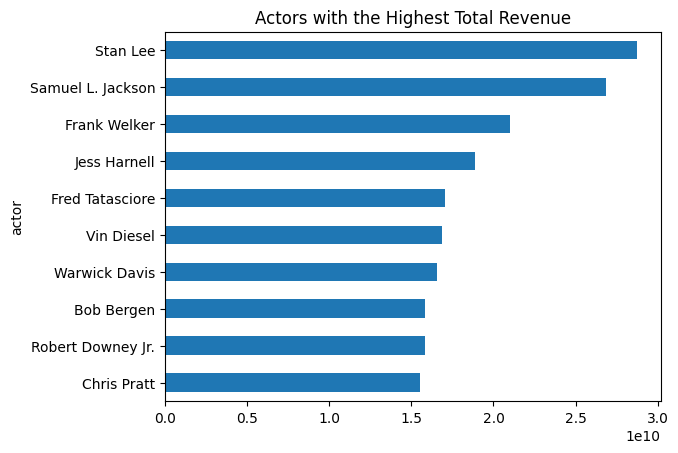

In [98]:
plt.title('Actors with the Highest Total Revenue')
actors.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

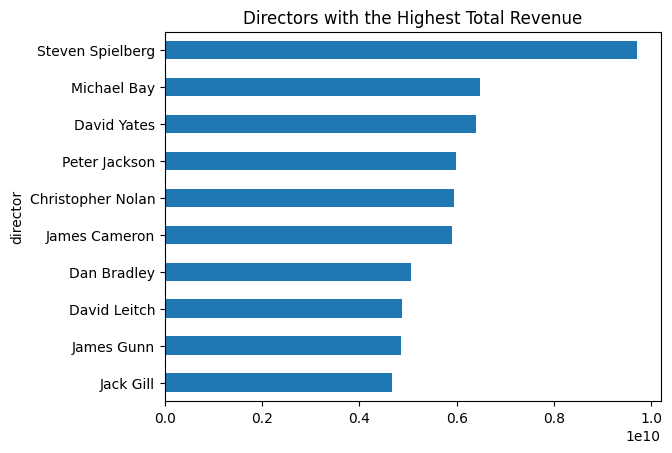

In [99]:
plt.title('Directors with the Highest Total Revenue')
movies.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
plt.show()

Se almacena el dataset final con todos los cambios para poder optimizar la rápida utlización en corridas posteriores

In [106]:
print("Cantidad final de observaciones en el dataset: {}".format(movies.shape[0]))
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')
movies.to_parquet('movies_final.parquet')

Cantidad final de observaciones en el dataset: 45620


In [65]:
movies = pd.read_parquet('./input/movies_final.parquet')

# Display the DataFrame
print(movies.head())

                   title                                           overview  \
0  !Women Art Revolution  Through intimate interviews, provocative art, ...   
1    #1 Cheerleader Camp  A pair of horny college guys get summer jobs a...   
2                 #Alive  As a grisly virus rampages a city, a lone man ...   
3                #Horror  Inspired by actual events, a group of 12 year ...   
4           #chicagoGirl  From her childhood bedroom in the Chicago subu...   

  release_date  vote_average  vote_count  \
0   2010-01-01             4           2   
1          NaT             3          23   
2          NaT             7        1597   
3          NaT             3          53   
4          NaT             7           1   

                                  genres      id original_language  \
0                          [Documentary]   55245                en   
1                        [Comedy, Drama]   41371                en   
2  [Horror, Action, Adventure, Thriller]  614696  

# Sistema de Recomendación

### Content Based Recommender:

Utiliza características de las películas como género, director, actores, descripción, y calificaciones.

Por ejemplo, si a un usuario le gustan las películas de ciencia ficción, el sistema recomendaría otras películas de ciencia ficción con actores o directores similares.

#### En base al overview:

In [66]:
movies['overview'].head()

0    Through intimate interviews, provocative art, ...
1    A pair of horny college guys get summer jobs a...
2    As a grisly virus rampages a city, a lone man ...
3    Inspired by actual events, a group of 12 year ...
4    From her childhood bedroom in the Chicago subu...
Name: overview, dtype: object

In [68]:
# Convierto todos los nulos a un mismo valor para poder trabajar con ellos
movies.replace([None, "nan", "", "NA", "NULL", -9999], np.nan, inplace=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [69]:
print('Proporcion de Nulos: ', round(movies['overview'].isna().sum() * 100 / len(movies),2),'%')

Proporcion de Nulos:  0.0 %


In [70]:
df = movies[movies['overview'].notna()]

No se tendra en cuenta las peliculas sin descripcion.

Se utiliza TF-IDF para transformar la descripcion. Esta tecnica nos dira **que tan relevante es una palabra en el overview, para la colección de peliculas**.

In [71]:
tfidf = TfidfVectorizer(stop_words='english')

tags_matrix = tfidf.fit_transform(df['overview'])

tags_matrix.shape

(45620, 75728)

Aproximadamente 76000 palabras fueron utilizadas para describir las 45000 peliculas.

In [72]:
# Obtener nombres de características (palabras)
feature_names = tfidf.get_feature_names_out()

# Sumar las frecuencias TF-IDF de cada palabra
sums = tags_matrix.sum(axis=0)

# Crear un DataFrame con palabras y sus frecuencias
data = []
for col, sum in zip(feature_names, sums.A1):
    data.append((col, sum))

word_freq_df = pd.DataFrame(data, columns=['word', 'freq'])

# Ordenar por frecuencia
word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)

# Mostrar las palabras más frecuentes
print(word_freq_df.head(10))

         word  freq
45117     nan   939
38434    life   589
73952   young   553
40420     man   503
45852     new   464
23327    film   449
22544  family   438
39267    love   433
73232   world   420
63553   story   409


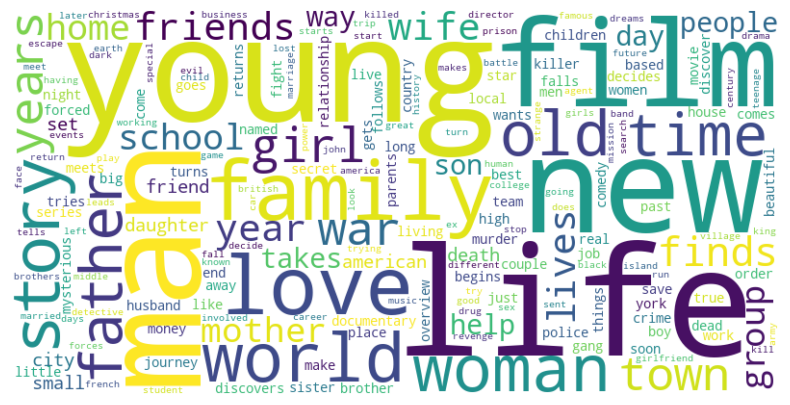

In [116]:
word_freq_dict = word_freq_df.set_index('word')['freq'].to_dict()

# Crear el word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Visualizar el word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se calcula la **similitud coseno** entre las descripciones de las películas y se crea una matriz de similitud.

$$
\text{cosine\_similarity}(A, B) = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$$


In [117]:
similarity_matrix = cosine_similarity(tags_matrix,tags_matrix)

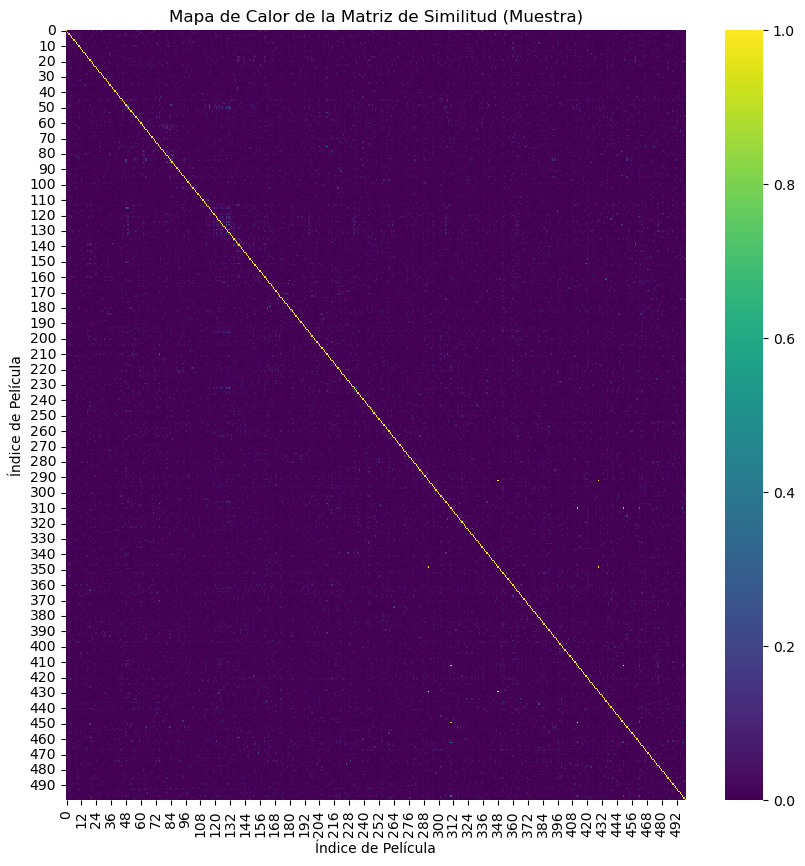

In [168]:
sampled_matrix = similarity_matrix[:500, :500]

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

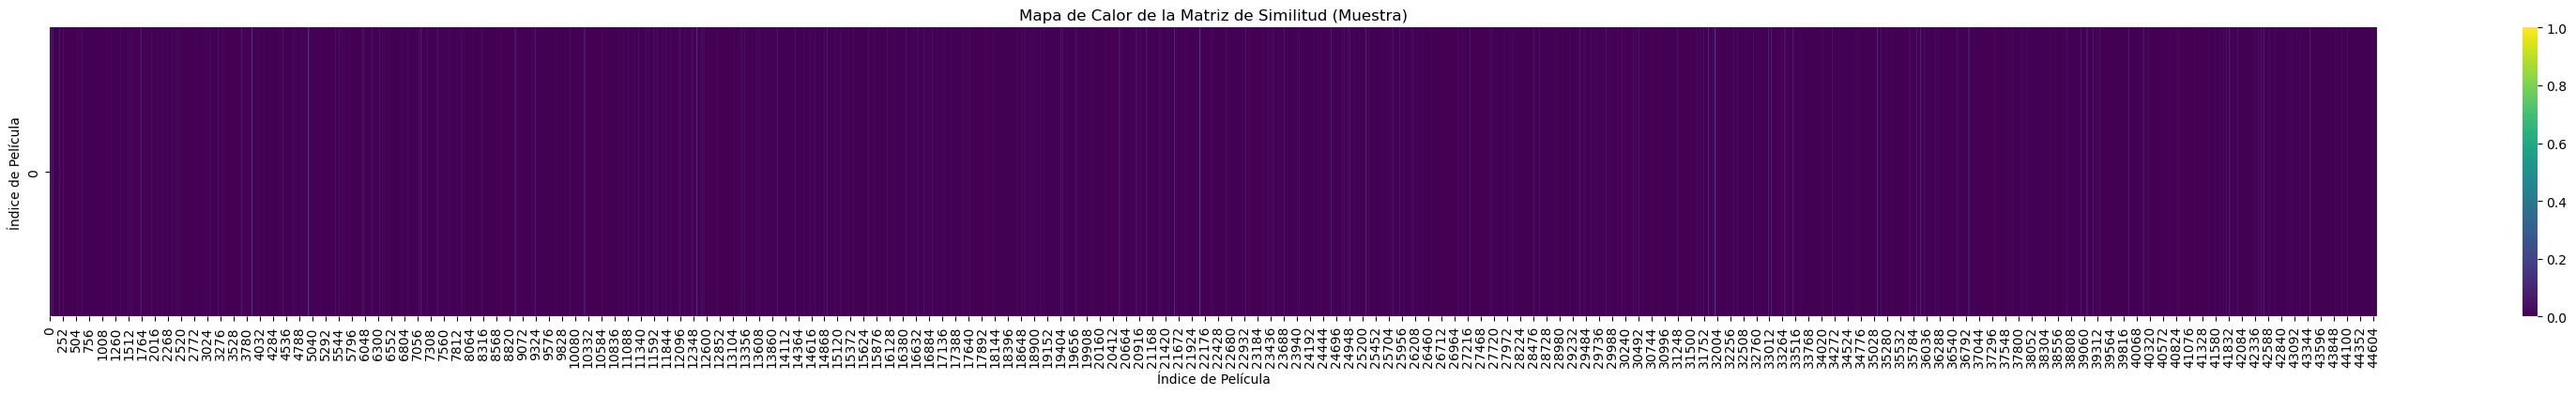

In [185]:
sampled_matrix = similarity_matrix[:1, :]

# Crear el mapa de calor
plt.figure(figsize=(40, 4))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

Se grafica una muestra para ver que tan representativo es el metodo para hacer una recomendacion. Pero como se puede ver, los valores de la similitud coseno tienden a ser cercanos a 0, por lo que las recomendaciones no seran del todo confiables.

In [118]:
def recommender(movie, n=30):
    # Encuentra el índice de la película proporcionada en el DataFrame.
    idx = df.loc[df['title'] == movie, :].index[0]

    # Obtén los puntajes de similitud con otras películas.
    similarity_score = list(enumerate(similarity_matrix[idx]))

    # Ordena los puntajes de similitud en orden descendente.
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Selecciona los puntajes de las 'n' películas más similares, excluyendo la primera que es la propia película introducida.
    similarity_score = similarity_score[1:n + 1]

    # Obtiene los índices de las películas más similares y sus puntajes de similitud.
    movie_indices = [i[0] for i in similarity_score]
    scores = [i[1] for i in similarity_score]

    # Crea un DataFrame con títulos de películas y sus puntajes de similitud.
    pd.set_option('display.float_format', '{:.2f}'.format)
    movie_scores = pd.DataFrame({
        'title': df['title'].iloc[movie_indices],
        'similarity_score': scores
    })

    return movie_scores

In [119]:
movie = df.loc[0,'title']
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  !Women Art Revolution
Películas similares: 
- The Cool School (Score: 0.273)
- JLG/JLG: Self-Portrait in December (Score: 0.269)
- Museum Hours (Score: 0.246)
- Let Fury Have the Hour (Score: 0.244)
- The Object of Beauty (Score: 0.241)


In [120]:
movie = 'Despicable Me'
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Despicable Me
Películas similares: 
- Saving Santa (Score: 0.227)
- The Happy Elf (Score: 0.193)
- Beethoven's Christmas Adventure (Score: 0.180)
- Elf (Score: 0.176)
- The Boss Baby: Christmas Bonus (Score: 0.173)


In [121]:
movie = "Harry Potter and the Philosopher's Stone"
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Harry Potter and the Philosopher's Stone
Películas similares: 
- Joy Division (Score: 0.264)
- Heavy Metal in Baghdad (Score: 0.251)
- X: The Unheard Music (Score: 0.202)
- Metal: A Headbanger's Journey (Score: 0.191)
- The Decline of Western Civilization Part II: The Metal Years (Score: 0.187)


#### En base al cast, director, keywords y genero:

Se vincula la base con los keywords:

In [161]:
keywords_df = pd.read_csv('input/keywords.csv')
keywords_df.head()

,Unnamed: 0,id,keywords
0,0,385687,"[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
1,1,299054,"[{'id': 9663, 'name': 'sequel'}, {'id': 12551,..."
2,2,951491,"[{'id': 1547, 'name': 'mexico city, mexico'}, ..."
3,3,926393,"[{'id': 131, 'name': 'italy'}, {'id': 266013, ..."
4,4,565770,"[{'id': 2898, 'name': 'armor'}, {'id': 9715, '..."


In [162]:
# Merge movies and credits DataFrames
movies = movies.merge(keywords_df, on='id', how='left').drop_duplicates(subset='id', keep='first')

In [163]:
movies['keywords'] = get_names(movies['keywords'])

Se selecciona unicamente los top 3 actores:

In [164]:
movies['cast'] = movies['cast'].apply(lambda x: x[:3] if len(x) >= 3 else x)

In [165]:
df = movies[['title', 'cast', 'director', 'keywords', 'genres']]

In [166]:
df = df.applymap(lambda x: np.nan if x == [] else x)

/var/folders/9k/p0fvsltn31bgmv55mws4vsnr0000gn/T/ipykernel_19413/2918052645.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [167]:
print('Proporcion de Nulos: ')
print( round(df.isna().sum() * 100 / len(movies),2))

Proporcion de Nulos: 
title       0
cast        5
director    2
keywords   30
genres      5
dtype: float64


In [168]:
df = df.dropna()

Se une toda la informacion para aplicar TF-IDF nuevamente. Se agrega multiples veces el nombre del director para darle mayor peso en la prediccion.

In [169]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [170]:
df['soup'] = df.apply(create_soup, axis=1)

In [171]:
tfidf = TfidfVectorizer(stop_words='english')

tags_matrix = tfidf.fit_transform(df['soup'])

tags_matrix.shape

(30492, 47237)

Aproximadamente 47237 palabras fueron utilizadas para describir las 30000 peliculas. Las palabras unicas disminuyeron.

In [172]:
# Obtener nombres de características (palabras)
feature_names = tfidf.get_feature_names_out()

# Sumar las frecuencias TF-IDF de cada palabra
sums = tags_matrix.sum(axis=0)

# Crear un DataFrame con palabras y sus frecuencias
data = []
for col, sum in zip(feature_names, sums.A1):
    data.append((col, sum))

word_freq_df = pd.DataFrame(data, columns=['word', 'freq'])

# Ordenar por frecuencia
word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)

# Mostrar las palabras más frecuentes
print(word_freq_df.head(10))

            word  freq
11753      drama   724
8753      comedy   670
42161   thriller   448
35830    romance   428
361       action   426
19032     horror   360
21004       john   347
9486       crime   336
13613     family   309
510    adventure   285


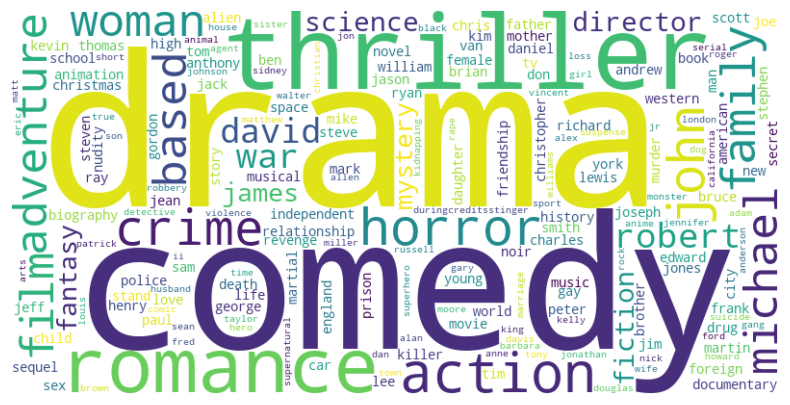

In [270]:
word_freq_dict = word_freq_df.set_index('word')['freq'].to_dict()

# Crear el word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Visualizar el word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Nuevamente se calcula la similitud coseno:

In [173]:
similarity_matrix = cosine_similarity(tags_matrix,tags_matrix)

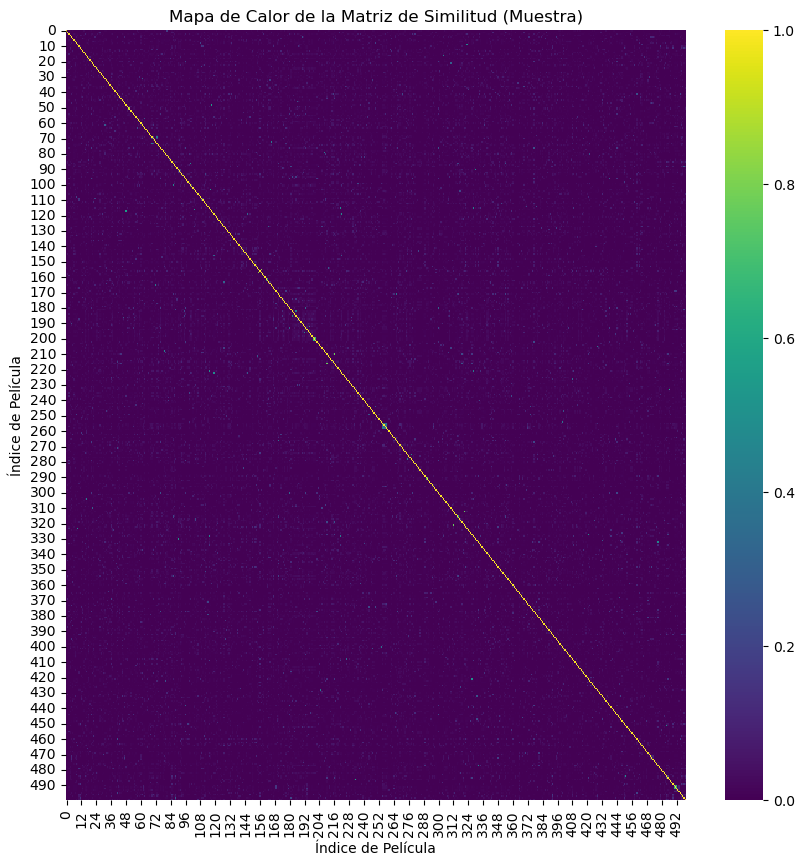

In [272]:
sampled_matrix = similarity_matrix[:500, :500]

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(sampled_matrix, cmap='viridis')
plt.title('Mapa de Calor de la Matriz de Similitud (Muestra)')
plt.xlabel('Índice de Película')
plt.ylabel('Índice de Película')
plt.show()

Se grafico la matriz sobre la misma muestra y se pueden ver resultados un poco mas representativos que utilizando unicamente la descripcion de la pelicula.

In [136]:
def recommender(movie, n=30):
    # Encuentra el índice de la película proporcionada en el DataFrame.
    idx = df.loc[df['title'] == movie, :].index[0]

    # Obtén los puntajes de similitud con otras películas.
    similarity_score = list(enumerate(similarity_matrix[idx]))

    # Ordena los puntajes de similitud en orden descendente.
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    # Selecciona los puntajes de las 'n' películas más similares, excluyendo la primera que es la propia película introducida.
    similarity_score = similarity_score[1:n + 1]

    # Obtiene los índices de las películas más similares y sus puntajes de similitud.
    movie_indices = [i[0] for i in similarity_score]
    scores = [i[1] for i in similarity_score]

    # Crea un DataFrame con títulos de películas y sus puntajes de similitud.
    pd.set_option('display.float_format', '{:.2f}'.format)
    movie_scores = pd.DataFrame({
        'title': df['title'].iloc[movie_indices],
        'similarity_score': scores
    })

    return movie_scores

In [137]:
movie = df.loc[0,'title']
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  !Women Art Revolution
Películas similares: 
- Teknolust (Score: 0.849)
- Conceiving Ada (Score: 0.814)
- Trial and Error (Score: 0.213)
- Humpday (Score: 0.204)
- Changing Habits (Score: 0.195)


In [138]:
movie = 'Despicable Me'
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Despicable Me
Películas similares: 
- The Big Heat (Score: 0.485)
- You Only Live Once (Score: 0.438)
- While the City Sleeps (Score: 0.436)
- The Blue Gardenia (Score: 0.430)
- Man Hunt (Score: 0.425)


In [139]:
movie = "Harry Potter and the Philosopher's Stone"
print('Película: ', movie)

recomendacion = recommender(movie,5)
print('Películas similares: ')
for index, row in recomendacion.iterrows():
    print(f"- {row['title']} (Score: {row['similarity_score']:.3f})")

Película:  Harry Potter and the Philosopher's Stone
Películas similares: 
- Broadway Babies (Score: 0.571)
- Hard to Handle (Score: 0.551)
- Gypsy (Score: 0.550)
- Lovely to Look At (Score: 0.550)
- No Time For Sergeants (Score: 0.544)


Se almacenan los df en formato parquet para luego poder ser accedidos en corridas posteriores

In [141]:
df.to_parquet('movies_with_credits.parquet')

In [153]:
ratings.to_parquet("ratings_parquet.parquet")

### Memory Based Collaborative Recommender (Filtros Colaborativos):

In [4]:
import pandas as pd
ratings = pd.read_parquet('./input/ratings_parquet.parquet')

In [2]:
movies_metadata = pd.read_parquet('./input/movies_final.parquet')

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59856295 entries, 0 to 59856294
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.8 GB


Tomo un sample del dataframe de ratings y evalúo si es representativo

In [6]:
ratings_sample = ratings.head(100000)
ratings_sample.to_parquet("./input/ratings_sample.parquet")

In [7]:
ratings_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
import numpy as np

distinct_count = len(ratings_sample['userId'].unique())
print("Id count:", distinct_count)

distinct_count = len(ratings_sample['movieId'].unique())
print("Movie count:", distinct_count)

rating_scale = np.sort((ratings_sample['rating'].unique()))
print("Rating scale:", rating_scale)


Id count: 1014
Movie count: 8832
Rating scale: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


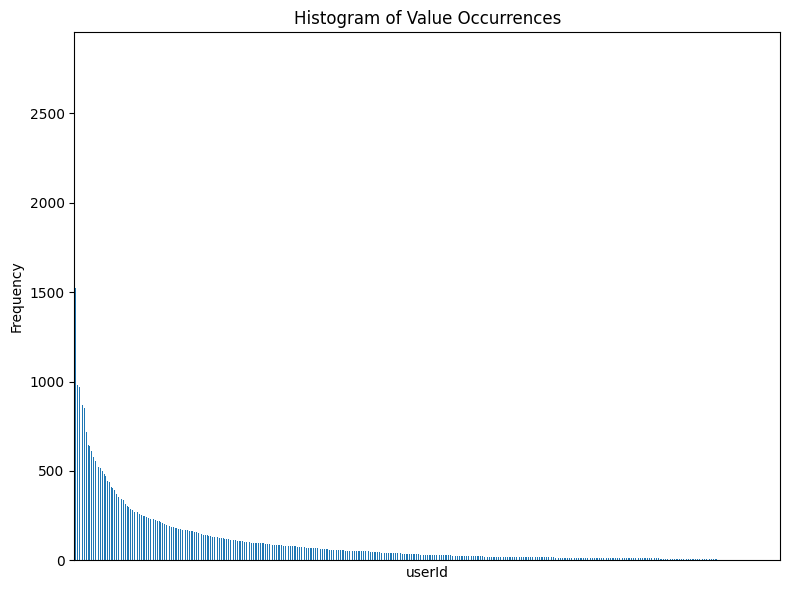

In [175]:
value_counts = ratings_sample['userId'].value_counts()
# Plotting the histogram
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.xticks([])  # Hide x-axis labels
plt.ylabel('Frequency')
plt.title('Histogram of Value Occurrences')
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [9]:

from datetime import datetime

ratings_sample['timestamp'] = ratings_sample['timestamp'].apply(lambda x: datetime.fromtimestamp(x))


/var/folders/9k/p0fvsltn31bgmv55mws4vsnr0000gn/T/ipykernel_19413/3482591339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_sample['timestamp'] = ratings_sample['timestamp'].apply(lambda x: datetime.fromtimestamp(x))


#### User - User:

Recomienda películas que usuarios con gustos similares han disfrutado.

In [21]:
ratings_sample = pd.read_parquet("./input/ratings_sample.parquet")

In [22]:
pivot_user2user = ratings_sample.pivot_table(values='rating', index='userId', columns='movieId')


In [48]:
pivot_user2user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 1 to 1014
Columns: 8832 entries, 1 to 176271
dtypes: float64(8832)
memory usage: 68.3 MB


<Axes: xlabel='movieId', ylabel='userId'>

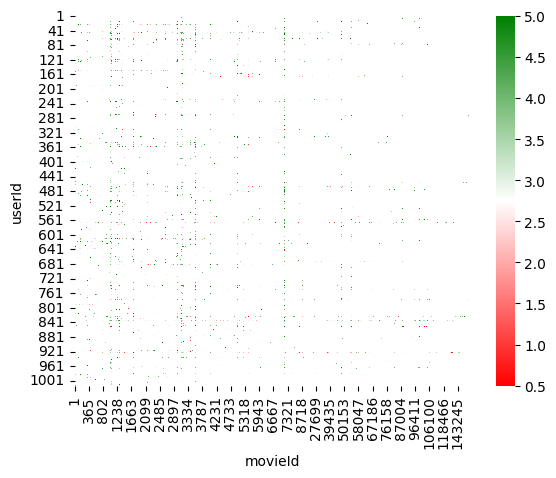

In [50]:
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)
sns.heatmap(pivot_user2user,cmap=cmap)

In [23]:
ratings_dict = {}

for index, row in pivot_user2user.iterrows():
    user_ratings = row.dropna().to_dict()
    ratings_dict[index] = user_ratings

In [24]:
def euclidean_similarity(person1, person2):
    common_ranked_items = [itm for itm in ratings_dict[person1] if itm in ratings_dict[person2]]
    rankings = [(float(ratings_dict[person1][itm]), float(ratings_dict[person2][itm])) for itm in common_ranked_items]
    distance = [pow(rank[0] - rank[1], 2) for rank in rankings]
    similarity = 1 / (1 + sum(distance))
    return similarity

In [25]:
euclidean_similarity(231,961)

0.015503875968992248

In [26]:
def pearson_similarity(person1, person2):

	common_ranked_items = [itm for itm in ratings_dict[person1] if itm in ratings_dict[person2]]

	n = len(common_ranked_items)

	s1 = sum([ratings_dict[person1][item] for item in common_ranked_items])
	s2 = sum([ratings_dict[person2][item] for item in common_ranked_items])

	ss1 = sum([pow(ratings_dict[person1][item], 2) for item in common_ranked_items])
	ss2 = sum([pow(ratings_dict[person2][item], 2) for item in common_ranked_items])

	ps = sum([ratings_dict[person1][item] * ratings_dict[person2][item] for item in common_ranked_items])

	num = n * ps - (s1 * s2)

	den = math.sqrt((n * ss1 - math.pow(s1, 2)) * (n * ss2 - math.pow(s2, 2)))

	return (num / den) if den != 0 else 0

In [27]:
from tabulate import tabulate

def recommend(person, bound, similarity=pearson_similarity):
    scores = [(similarity(person, other), other) for other in ratings_dict if other != person]
    
    scores.sort()
    scores.reverse()
    scores = scores[0:bound]

    recomms = {}

    for sim, other in scores:
        ranked = ratings_dict[other]

        for itm in ranked:
            if itm not in ratings_dict[person]:
                weight = sim * ranked[itm]

                if itm in recomms:
                    s, weights = recomms[itm]
                    recomms[itm] = (s + sim, weights + [weight])
                else:
                    recomms[itm] = (sim, [weight])

    recommendations = {}

    for r in recomms:
        sim, item = recomms[r]
        recommendations[r] = sum(item) / sim

    # Get movie titles for top recommendations
    top_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:bound]
    top_recommendations_with_titles = []
    for movie_id, rating in top_recommendations:
        movie_title = movies_metadata.loc[movies_metadata['id'] == movie_id, 'title'].values
        if len(movie_title) > 0:
            top_recommendations_with_titles.append((movie_id, movie_title[0], rating))

    # Print recommendations as a table
    headers = ["Movie ID", "Title", "Rating"]
    print(tabulate(top_recommendations_with_titles, headers=headers, tablefmt="pretty"))



In [69]:
print("The top recommendations for the user are:")
recommend(231, 5, euclidean_similarity)

The top recommendations for the user are:


+----------+------------+--------+
| Movie ID |   Title    | Rating |
+----------+------------+--------+
|   953    | Madagascar |  5.0   |
|   2125   |  Wedlock   |  4.0   |
+----------+------------+--------+


### Item - Item:

Si a un usuario le gustó una pelicula, el sistema podría recomendar otras películas bien calificadas por aquellos que también disfrutaron esa pelicula.

In [28]:
import numpy as np

def movies_pearson_similarity(movie1, movie2, ratings_dict):
    ratings1 = []
    ratings2 = []

    for user in ratings_dict:
        if movie1 in ratings_dict[user] and movie2 in ratings_dict[user]:
            ratings1.append(ratings_dict[user][movie1])
            ratings2.append(ratings_dict[user][movie2])

    if not ratings1 or not ratings2:
        return 0  # Return zero similarity if no common ratings are found

    # Calculate Pearson correlation coefficient
    mean_rating1 = np.mean(ratings1)
    mean_rating2 = np.mean(ratings2)

    numerator = sum((x - mean_rating1) * (y - mean_rating2) for x, y in zip(ratings1, ratings2))
    denominator = np.sqrt(sum((x - mean_rating1)**2 for x in ratings1)) * np.sqrt(sum((y - mean_rating2)**2 for y in ratings2))

    if denominator == 0:
        return 0  # Return zero similarity if denominator is zero to avoid division by zero

    pearson_corr = numerator / denominator
    return pearson_corr

In [29]:
def recommend_similar_movies(target_movie, similarity=movies_pearson_similarity, num_recommendations=5):
    movie_similarities = {}

    for movie in ratings_dict:
        if movie != target_movie:
            similarity_score = similarity(target_movie, movie, ratings_dict)
            movie_similarities[movie] = similarity_score

    # Sort movies by their similarity scores
    similar_movies = sorted(movie_similarities.items(), key=lambda x: x[1], reverse=True)

    # Return the top N most similar movies
    return similar_movies[:num_recommendations]

In [30]:
from tabulate import tabulate

def recommend_similar_movies(target_movie, similarity=movies_pearson_similarity, num_recommendations=5):
    movie_similarities = {}

    print("Target Movie:", movies_metadata.loc[movies_metadata['id'] == target_movie, 'title'])

    for movie in ratings_dict:
        if movie != target_movie:
            similarity_score = similarity(target_movie, movie, ratings_dict)
            movie_similarities[movie] = similarity_score

    # Sort movies by their similarity scores
    similar_movies = sorted(movie_similarities.items(), key=lambda x: x[1], reverse=True)

    # Get movie titles for the top N most similar movies
    top_recommendations_with_titles = []
    for movie_id, score in similar_movies[:num_recommendations]:
        movie_title = movies_metadata.loc[movies_metadata['id'] == movie_id, 'title'].values
        if len(movie_title) > 0:
            top_recommendations_with_titles.append((movie_id, movie_title[0], round(score, 2)))

    # Define headers for the table
    headers = ["Movie ID", "Title", "Similarity"]

    # Print recommendations as a table
    print(tabulate(top_recommendations_with_titles, headers=headers, tablefmt="pretty"))

In [60]:
recommend_similar_movies(38)

Target Movie: 13093    Eternal Sunshine of the Spotless Mind
Name: title, dtype: object


+----------+-----------------------+------------+
| Movie ID |         Title         | Similarity |
+----------+-----------------------+------------+
|    11    |       Star Wars       |    1.0     |
|   350    | The Devil Wears Prada |    1.0     |
|   750    |    Murder She Said    |    1.0     |
+----------+-----------------------+------------+


### Model-Based Collaborative Filtering:

Implementa modelos de aprendizaje automático para predecir las preferencias del usuario.

Por ejemplo, utilizar un modelo de factorización de matrices para predecir las calificaciones de películas que un usuario aún no ha visto.

Se utiliza la libreía Surprise y se crea un objeto como dataset. Este dataset contiene los siguientes elementos:
1. Los IDs de los usuarios
2. Los IDs de cada pelicula.
3. El rating correspondiente, en una escala del 1 al 5

In [149]:
# Cargo el dataframe almacenado
ratings_sample = pd.read_parquet('./input/ratings_sample.parquet')

In [150]:
from surprise import Dataset, Reader

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings_sample[['userId', 'movieId', 'rating']], reader)

Entrenamiento de modelo SVD con cross-validation

In [151]:
from surprise import SVD
from surprise.model_selection import cross_validate

svd = SVD(verbose=True, n_epochs=3)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 0
Processing epoch 1
Processing epoch 2
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9016  0.9103  0.9015  0.8969  0.9046  0.9030  0.0044  
MAE (testset)     0.6985  0.7006  0.6971  0.6940  0.7008  0.6982  0.0025  
Fit time          0.23    0.23    0.26    0.25    0.27    0.25    0.02    
Test time         0.21    0.19    1.64    0.33    0.26    0.53    0.56    


{'test_rmse': array([0.90159596, 0.91034699, 0.90153908, 0.8969312 , 0.90459254]),
 'test_mae': array([0.69852975, 0.70057623, 0.69710086, 0.69396889, 0.70079192]),
 'fit_time': (0.2255721092224121,
  0.22548818588256836,
  0.2574951648712158,
  0.25100231170654297,
  0.2728691101074219),
 'test_time': (0.21106290817260742,
  0.1901543140411377,
  1.6433689594268799,
  0.33321690559387207,
  0.26466798782348633)}

Se observa un buen poder predictivo, dado el error cuadrático medio de 0.9

In [152]:
# Creación del dataset de entrenamiento
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2


Ahora podemos realizar predicciones para una pelicula en específico, con el método predict.

In [153]:
svd.predict(uid=10, iid=100)

Prediction(uid=10, iid=100, r_ui=None, est=3.5809507790226767, details={'was_impossible': False})

In [154]:
# Se carga el dataset almacenado post EDA
movies = pd.read_parquet('./input/movies_final.parquet')

In [155]:
movie_counts = ratings_sample['movieId'].value_counts()

# Display the counts of each movieId
print(movie_counts.head(20))

movieId
318     362
356     343
296     341
593     323
2571    309
260     306
480     297
1       290
589     264
527     251
1210    250
110     248
1198    246
1196    246
50      243
4993    238
780     237
1270    235
2959    229
858     225
Name: count, dtype: int64


In [156]:
movie_info = movies.loc[movies['id'] == 296]
print(movie_info)

                                    title  \
37142  Terminator 3: Rise of the Machines   

                                                overview release_date  \
37142  It's been 10 years since John Connor saved Ear...   2003-02-07   

       vote_average  vote_count                               genres   id  \
37142           5.9      2177.0  [Action, Thriller, Science Fiction]  296   

      original_language  popularity       budget  ...  production_companies  \
37142                en   20.818907  200000000.0  ...     Columbia Pictures   

                                    production_countries  \
37142  [Germany, United Kingdom, United States of Ame...   

                               spoken_languages       profit    year  \
37142  [{'iso_639_1': 'en', 'name': 'English'}]  235000000.0  2003.0   

                                                    cast  \
37142  [Arnold Schwarzenegger, Nick Stahl, Claire Dan...   

                                                    crew     

In [249]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'budget', 'revenue',
       'runtime', 'status', 'tagline', 'video', 'belongs_to_collection',
       'homepage', 'poster_path', 'production_companies',
       'production_countries', 'spoken_languages', 'profit', 'year', 'cast',
       'crew', 'director', 'cast_size', 'crew_size'],
      dtype='object')

Generar Recomendaciones

In [268]:
movies.columns

Index(['title', 'overview', 'release_date', 'vote_average', 'vote_count',
       'genres', 'id', 'original_language', 'popularity', 'budget', 'revenue',
       'runtime', 'status', 'tagline', 'video', 'belongs_to_collection',
       'homepage', 'poster_path', 'production_companies',
       'production_countries', 'spoken_languages', 'profit', 'year', 'cast',
       'crew', 'director', 'cast_size', 'crew_size'],
      dtype='object')

In [159]:
import difflib
import random

def get_movie_id(movie_title, movies_metadata):
    
    existing_titles = list(movies_metadata['title'].values)
    closest_titles = difflib.get_close_matches(movie_title, existing_titles)
    movie_id = movies_metadata[movies_metadata['title'] == closest_titles[0]]['id'].values[0]
    return movie_id

def get_movie_info(movie_id, movies_metadata):
    
    movie_info = movies_metadata[movies_metadata['id'] == movie_id][['id', 'crew', 
                                                    'director', 'title', 'genres']]
    return movie_info.to_dict(orient='records')

def predict_review(user_id, movie_title, model, movies_metadata):
    
    movie_id = get_movie_id(movie_title, movies_metadata)
    review_prediction = model.predict(uid=user_id, iid=movie_id)
    return review_prediction.est

def generate_recommendation(user_id, model, movies_metadata, thresh=4):
    
    movie_titles = list(movies_metadata['title'].values)
    random.shuffle(movie_titles)
    
    for movie_title in movie_titles:
        rating = predict_review(user_id, movie_title, model, movies_metadata)
        if rating >= thresh:
            movie_id = get_movie_id(movie_title, movies_metadata)
            return get_movie_info(movie_id, movies_metadata)

Generate Recommendation

In [ ]:
generate_recommendation(246, svd, movies, 4)

### Hybrid Recommender:

Combinación de varias técnicas, por ejemplo, usando tanto recomendaciones basadas en contenido como colaborativas.

Por ejemplo, podría sugerir películas basadas en los géneros preferidos del usuario y también en lo que usuarios similares han visto.

In [36]:
from surprise import SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import dump

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [40]:
ratings_sample = pd.read_parquet('./input/ratings_sample.parquet')

In [41]:
ratings_sample.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [38]:
def convert_traintest_dataframe_forsurprise(training_dataframe, testing_dataframe):
    reader = Reader(rating_scale=(0, 5))
    trainset = Dataset.load_from_df(training_dataframe[['userId', 'movieId', 'rating']], reader)
    testset = Dataset.load_from_df(testing_dataframe[['userId', 'movieId', 'rating']], reader)
    trainset = trainset.construct_trainset(trainset.raw_ratings)
    testset = testset.construct_testset(testset.raw_ratings)
    return trainset, testset

In [44]:
print(len(ratings_sample))

100000


In [114]:
from sklearn.model_selection import train_test_split

movies_with_genre = pd.merge(ratings_sample, movies_filtered, left_on='movieId', right_on='id', how='left')

movies_with_genre = movies_with_genre[~pd.isnull(movies_with_genre['id'])]

train, test = train_test_split(movies_with_genre, test_size=0.2, random_state=42)

trainset, testset = convert_traintest_dataframe_forsurprise(train, test)



In [53]:
# basic collaborative filtering algorithm taking into account a baseline rating.
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
knnbaseline_algo = KNNBaseline(sim_options=sim_options)

knnbaseline_algo.fit(trainset)
knnbaseline_predictions = knnbaseline_algo.test(testset)

file_name = 'KnnBaseline_model'
dump.dump(file_name, algo=knnbaseline_predictions)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(knnbaseline_predictions)
accuracy.mae(knnbaseline_predictions)
print("Done!")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8813
MAE:  0.6787
Done!


In [54]:
svd_algo = SVD()

svd_algo.fit(trainset)
svd_predictions = svd_algo.test(testset)

file_name = 'svd_model'
dump.dump(file_name, algo=svd_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svd_predictions)
accuracy.mae(svd_predictions)
print("Done!")

RMSE: 0.8666
MAE:  0.6667
Done!


In [55]:
svdpp_algo = SVDpp()

svdpp_algo.fit(trainset)
svdpp_predictions = svdpp_algo.test(testset)

file_name = 'svd_model'
dump.dump(file_name, algo=svdpp_algo)
# _, loaded_algo = dump.load(file_name)

accuracy.rmse(svdpp_predictions)
accuracy.mae(svdpp_predictions)
print("Done!")

RMSE: 0.8567
MAE:  0.6598
Done!


In [56]:
movies = pd.read_parquet('./input/movies_final.parquet')

In [58]:
movies['tagline'] = movies['tagline'].fillna('')
movies['description_genre'] = movies['overview'] + movies['tagline'] + 2*movies['genres']
movies['description_genre'] = movies['description_genre'].fillna('')

In [63]:
tf_new = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.0, stop_words='english')

text_data = movies['description_genre'].astype(str).tolist()

# Fit and transform the text data
tfidf_matrix_new = tf_new.fit_transform(text_data)

In [64]:
cosine_sim_new = linear_kernel(tfidf_matrix_new, tfidf_matrix_new)


In [87]:
movies = movies.reset_index()
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
indices.head(2)

title
!Women Art Revolution    0
#1 Cheerleader Camp      1
dtype: int64

In [88]:
def get_recommendations_new(title):
    idx = indices[title]
    if type(idx) != np.int64:
        if len(idx)>1:
            print("ALERT: Multiple values")
            idx = idx[0]
    sim_scores = list(enumerate(cosine_sim_new[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['movieId'].iloc[movie_indices]

In [73]:
movies_filtered = movies[['id','title','genres']]

df_sorted = movies_filtered.sort_values(by='id')

print(df_sorted)

            id                title                                genres
3283         2                Ariel                        [Drama, Crime]
29568        3  Shadows in Paradise                       [Drama, Comedy]
12958        5           Four Rooms                       [Crime, Comedy]
18111        6       Judgment Night             [Action, Thriller, Crime]
31236       11            Star Wars  [Adventure, Action, Science Fiction]
...        ...                  ...                                   ...
19090  1203385       L'Albume D'Oro                                    []
33888  1203393           The Burden                         [Documentary]
481    1203440          5 Feet Away                               [Drama]
34131  1203564  The Choice Is Yours                         [Documentary]
19192  1203973       La Distraction                       [Comedy, Drama]

[45620 rows x 3 columns]


In [78]:
movies_with_genre = pd.merge(ratings_sample, movies_filtered, left_on='movieId', right_on='id', how='left')


In [85]:
unique_genre = movies_with_genre['genres'].explode().unique()

# Get the count of each genre
genre_distribution = movies_with_genre['genres'].explode().value_counts()

# Make a dict assigning an index to a genre
genre_dict = {k: v for v, k in enumerate(unique_genre)}


{'Drama': 0,
 'Mystery': 1,
 'Romance': 2,
 'Comedy': 3,
 nan: 4,
 'Crime': 5,
 'Action': 6,
 'Foreign': 7,
 'Documentary': 8,
 'War': 9,
 'Adventure': 10,
 'Fantasy': 11,
 'Thriller': 12,
 'Science Fiction': 13,
 'Horror': 14,
 'History': 15,
 'Music': 16,
 'Family': 17,
 'Western': 18,
 'TV Movie': 19,
 'Animation': 20}

In [ ]:
user_ids = movies_with_genre['userId'].unique()
user_df = pd.DataFrame(columns=['userId', 'user_vector', 'avg_rating', 'num_movies_rated'])

for user_id in user_ids:
    print(user_id)
    user_rating_df = movies_with_genre[(movies_with_genre['userId'] == user_id)]
    print(user_rating_df)

    user_vector = np.zeros(len(genre_dict))
    count_vector = np.zeros(len(genre_dict))
    
    user_avg_rating = 0
    movies_rated_count = 0
    
    for _, row in user_rating_df.iterrows():
        user_avg_rating += row.rating 
        movies_rated_count += 1
        genres = row.genres
        
        # Check if genres is a float (non-iterable)
        if not isinstance(genres, float):
            user_movie_vector = np.zeros(len(genre_dict))
            
            for g in genres:
                user_movie_vector[genre_dict[g]] = 1
                count_vector[genre_dict[g]] += 1

            user_vector += user_movie_vector * row.rating

    count_vector = np.where(count_vector == 0, 1, count_vector)
    user_vector = np.divide(user_vector, count_vector)
    user_avg_rating /= movies_rated_count
    row_df = pd.DataFrame([[user_id, user_vector, user_avg_rating, movies_rated_count]], 
                          columns=['userId', 'user_vector', 'avg_rating', 'num_movies_rated'])
    user_df = pd.concat([user_df, row_df], ignore_index=True)

Popularity model

In [132]:
def genre_based_popularity(genre):
    mask = movies_with_genre.genres.apply(lambda x: genre in x)
    filtered_movie = movies_with_genre[mask]
    filtered_movie = filtered_movie.sort_values(by='popularity', ascending=False)
#     filtered_movie = filtered_movie.sort_values(by='wr', ascending=False)
    return filtered_movie['movieId'].head(10).values.tolist() 

In [133]:
user_df['user_vector'] = user_df['user_vector'].apply(lambda x: np.array_str(x))
user_df['user_vector'] = user_df['user_vector'].apply(lambda x: x.replace('[', ' ').replace(']', ' ').strip().split())
user_df['user_vector'] = user_df['user_vector'].apply(lambda x: np.asarray(x).astype(float))

In [134]:
def user_top_genre(userId):
    user_vec = user_df['user_vector'][user_df['userId'] == userId].values[0].copy()
    top_genre_indices = np.flip(np.argsort(user_vec))
    genre_list = []
    for i in top_genre_indices[:3]:
        genre_list.append(idx_to_genre[i])
    return genre_list

In [135]:
user_top_genre(1)


['Crime', 'Romance', 'Comedy']

Hybrid Model

In [136]:
knn_baseline = dump.load('KnnBaseline_model')
svdpp = dump.load('svd_model') 

In [137]:
# List of users in testing data:
user_list = test['userId'].unique()

In [138]:
test_movies = test[test['userId'] == 60]
test_movies.head()

,userId,movieId,rating,timestamp,id,title,genres
5924,60,1252,4.0,1136304311,1252.0,Lonely Hearts,"[Drama, Thriller, Crime, Romance]"
5915,60,714,5.0,1136307133,714.0,Tomorrow Never Dies,"[Adventure, Action, Thriller]"
5908,60,168,0.5,1136304366,168.0,Star Trek IV: The Voyage Home,"[Science Fiction, Adventure]"
5998,60,27905,4.0,1136306150,27905.0,Island of the Fishmen,"[Science Fiction, Horror]"
5940,60,1986,0.5,1136305753,1986.0,Live and Become,[Drama]


In [144]:
# Combined model predicion on testing data, using top movies to generate more movies based on movie similarity and popularity

def hybrid(userId):
    user_movies = test[test['userId'] == userId]
    user_movies['est'] = user_movies['movieId'].apply(lambda x: 0.6*knnbaseline_algo.predict(userId,x).est + 0.4*svdpp_algo.predict(userId, x).est)    
    user_movies = user_movies.sort_values(by ='est', ascending=False).head(4)
    user_movies['Model'] = 'SVD + CF'
#     user_movies = user_movies['movieId'].values.tolist()
#     print("User liked movies list: ", user_movies)
    
    recommend_list = user_movies[['movieId', 'est', 'Model']]
    print(recommend_list.head())

#     top_movie = user_movies['movieId'].iloc[0]
#     print("Top movie id", top_movie)
#     top_movie_title = movies['title'][movies['movieId'] == top_movie].values[0]
#     print("Top movie title", top_movie_title)

    movie_list = recommend_list['movieId'].values.tolist()
    print(movie_list)
    sim_movies_list = []
    for movie_id in movie_list:
        # Call content based 
        movie_title = movies_with_genre['title'][movies_with_genre['movieId'] == movie_id].values[0]
        sim_movies = get_recommendations_new(movie_title)
#         print(sim_movies.values.tolist())
        sim_movies_list.extend(sim_movies)
    
    
    # Compute ratings for the popular movies
    for movie_id in sim_movies_list:
        pred_rating = 0.6*knnbaseline_algo.predict(userId, movie_id).est + 0.4*svdpp_algo.predict(userId, movie_id).est
        row_df = pd.DataFrame([[movie_id, pred_rating, 'Movie similarity']], columns=['movieId', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    
    # Popular based movies
    top_genre_list = user_top_genre(userId)
    print("User top genre list: ", top_genre_list)
    
    popular_movies = []
    for top_genre in top_genre_list:
        popular_movies.extend(genre_based_popularity(top_genre))
    print("Final list: ", popular_movies)
    
    # Compute ratings for the popular movies
    for movie_id in popular_movies:
        pred_rating = 0.6*knnbaseline_algo.predict(userId, movie_id).est + 0.4*svdpp_algo.predict(userId, movie_id).est
        row_df = pd.DataFrame([[movie_id, pred_rating, 'Popularity']], columns=['movieId', 'est','Model'])
        recommend_list = pd.concat([recommend_list, row_df], ignore_index=True)
    recommend_list = recommend_list.drop_duplicates(subset=['movieId'])
    train_movie_list = train[train['userId']==userId]['movieId'].values.tolist()
    
    # Remove movies in training for this user
    mask = recommend_list.movieId.apply(lambda x: x not in train_movie_list)
    recommend_list = recommend_list[mask]
    
    return recommend_list

In [141]:
train[train['userId'] == 524].sort_values(by = 'rating', ascending = False)


,userId,movieId,rating,timestamp,id,title,genres
49683,524,95,5.0,847140395,95.0,Armageddon,"[Action, Thriller, Science Fiction, Adventure]"
49755,524,588,5.0,847140091,588.0,Silent Hill,"[Horror, Mystery]"
49717,524,316,5.0,847140116,316.0,Grill Point,"[Comedy, Drama]"
49746,524,500,5.0,847140217,500.0,Reservoir Dogs,"[Crime, Thriller]"
49706,524,253,5.0,847140190,253.0,Live and Let Die,"[Adventure, Action, Thriller]"
49747,524,508,5.0,847140422,508.0,Love Actually,"[Comedy, Romance, Drama]"
49763,524,780,5.0,847140505,780.0,The Passion of Joan of Arc,"[Drama, History]"
49752,524,552,5.0,847140559,552.0,Bread and Tulips,"[Drama, Comedy, Romance]"
49673,524,11,5.0,847140344,11.0,Star Wars,"[Adventure, Action, Science Fiction]"
49744,524,480,5.0,847140143,480.0,Monsoon Wedding,"[Comedy, Drama, Romance]"


In [142]:
test[test['userId'] == 574]


,userId,movieId,rating,timestamp,id,title,genres
55112,574,296,4.5,1430450552,296.0,Terminator 3: Rise of the Machines,"[Action, Thriller, Science Fiction]"
55138,574,3175,4.0,1430450999,3175.0,Barry Lyndon,"[Drama, Romance, War]"
55162,574,6373,4.0,1430450224,6373.0,The Very Thought of You,"[Comedy, Romance]"
55150,574,4973,4.0,1430449916,4973.0,Under the Sand,"[Drama, Mystery]"
55186,574,58559,4.0,1430449926,58559.0,Confession of a Child of the Century,[Drama]
55175,574,26662,5.0,1430449700,26662.0,Detective Conan: The Phantom of Baker Street,"[Animation, Adventure, Mystery]"


In [161]:
test['userId']

34249     387
10309     120
59852     625
6801       65
98402     990
         ... 
99832    1012
11333     132
21984     251
87249     877
28486     340
Name: userId, Length: 7980, dtype: int64

In [163]:
hybrid(524)

/var/folders/9k/p0fvsltn31bgmv55mws4vsnr0000gn/T/ipykernel_1497/4023297354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_movies['est'] = user_movies['movieId'].apply(lambda x: 0.6*knnbaseline_algo.predict(userId,x).est + 0.4*svdpp_algo.predict(userId, x).est)


       movieId       est     Model
49719      318  4.900765  SVD + CF
49682       62  4.315467  SVD + CF
49753      553  4.295726  SVD + CF
49708      266  4.256260  SVD + CF
[318, 62, 553, 266]


KeyError: 'movieId'

# Deploy:

In [27]:
import pandas as pd
import shelve
import pickle
import seaborn as sns
import requests
from flask import  Flask
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Creamos una aplicación para recomendar peliculas similares a un input

In [28]:
app = Flask('Modelo Peliculas')

In [61]:
models = {
    'recommend_similar_movies': recommend_similar_movies
}

In [62]:
with shelve.open('models_db') as db:
    db['models'] = models

In [63]:
@app.route("/", methods=['GET'])
def hello():
    alive = "La app está viva"
    return alive

@app.route("/predict/<movie>", methods=['GET'])
def predictSales(movie):
#     s = shelve.open("../Data/handson_model.db")
#     model = s["model"]
    
    with shelve.open('models_db') as db:
        stored_functions = db['models'] 
    
    recommend_similar_movies = stored_functions['recommend_similar_movies']()

    
    
    # The return type must be a string, dict, tuple, Response instance, or WSGI callable
    result = {"Recommendations": recommend_similar_movies(movie)}
    return result

In [64]:
app.run(host='0.0.0.0', port = 5017)

 * Serving Flask app 'Modelo Peliculas'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5017
 * Running on http://192.168.0.37:5017
Press CTRL+C to quit
127.0.0.1 - - [28/Nov/2023 17:44:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2023 17:44:38] "GET /favicon.ico HTTP/1.1" 404 -
192.168.0.37 - - [28/Nov/2023 17:44:48] "GET / HTTP/1.1" 200 -
192.168.0.37 - - [28/Nov/2023 17:44:52] "GET /favicon.ico HTTP/1.1" 404 -


In [ ]:
recommend_similar_movies